##### Copyright (C) 2022 Burak ÇELİK

In [ ]:
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

## __Prerequisites__

> __You need to install `evdsts` by running the cell below to use this application on Google Colab.__  

> __You don't need to install the package if you have already installed `evdsts` on your current environment and you're currently on your local Jupyter Notebook.__

In [ ]:
# test if the evdsts has already been installed if you're not sure.
try:
    import evdsts
    print('evdsts has already been installed')
except ModuleNotFoundError:
    print('You need to intall evdsts by runing the cell above')
except Exception as ex:
    print('An unknown exception has been occured. Examine the output!')
    raise ex

In [ ]:
# installs evdsts in current environment if it's not already installed
%pip install evdsts

> __You need a unique API Key to use this example application. Please follow the instructions below if you
> haven't got your API Key from EDDS,  yet.__

1. Open EDDS website. [__EDDS__](https://evds2.tcmb.gov.tr/index.php?/evds/login)
2. You can change the website language by clicking __`EN`__ on the upper right bar.
3. Click __`SIGN UP`__ button on current page.
4. Fill up the form with requested information and register.
5. Check for incoming mails from the inbox that belongs to e-mail address you used for  
   EDDS membership, and verify your e-mail address via the received e-mail.
6. Open the same page and log into your account.
7. Click on your username and then click __`Profile`__ on opened sliding menu.
8. You can get your API key by clicking __`API Key`__ on newly opened page.

## __EVDSTS Example Cases__

### 1. [__The Connector Basics__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-basics-1)

Here, we'll have a look at some important features of the `Connector` class of the `evdsts`.
`Connector` is responsible for all data retrieving operations from the EDDS.

#### 1.1. [__Importing the Connector and Creating an Instance__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#connector-instance)

Firstly, you'll need to import `Connector` class into your project in order to retrieve data from
EDDS using `evdsts`. 


In [1]:
from evdsts import Connector

and then you'll need an instance of the `Connector` in order carry out retrieving processes.

In [2]:
connector = Connector('YOUR_API_KEY', language="EN")

You can `print` the `connector` object to see some information about it.

In [ ]:
connector  # This prints the API Key as well, therefore, haven't run deliberately.

Parameters you can specify while instantiation of the `Connector`:

In [ ]:
# simple initialization
connector = Connector('YOUR_API_KEY', language='EN')

# Shows the url the connector tries to connect
connector = Connector('YOUR_API_KEY', language='EN', show_links=True)

# connection behind a proxy
proxies = {"http": "127.0.0.1", "https": "127.0.0.1"}
connector = Connector('YOUR_API_KEY', language='EN', proxy_server=proxies)

# Disables SSL certificate verification for connected server
connector = Connector('YOUR_API_KEY', language='EN', verify_certificates=False)

# Jupyter Notebook mode for better screen representations on Jupyter. This only affects screen
# representations, that is, has nothing to do with internal calculations.
connector = Connector('YOUR_API_KEY', language='EN', jupyter_mode=True)

# sets precision to 2 for all retrieved series. This affects both screen representation and also
# internal calculations.
connector = Connector('YOUR_API_KEY', language='EN', precision=2)

#### 1.2. [__Saving Your API Key for Future Use__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#save-the-key)

You don't need to use your API Key for everytime you start your application. You can save your api
key on disk in order not to use the api key for further initializations of the `Connector`. You can
use `save_key()` method to save your current key on disk.

In [ ]:
connector = Connector('YOUR_API_KEY', language='EN')
connector.save_key()  # now you don't need to use your api key for your current project anymore.

you can instantiate a `Connector` class without using your api key once you save your key to disk.

In [7]:
connector = Connector(language='EN')  # your key is read from the disk here.

#### 1.3. [__Searching Into Database for Series Name Definition of EDDS__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#searching-into-database)

You don't need to visit the EDDS website to find out what is the name identification of the EDDS
for the series you would like to retrieve. You can search series names by keywords without leaving
the `evdsts` thanks to `where()` method.

In [100]:
connector = Connector(language="EN")    # Assuming you have already saved your API Key on disk.
connector.where("consumer price index"); # search takes around 0.5 seconds.

5 most relevant results for 'consumer price index' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.FE.OKTG01         Consumer Price Index                                            MONTHLY          01-01-2003 
TP.MK.F.BILESIK.TUM  (PRICE INDICES) BIST All Shares-100 Index (XTUMY), According to BUSINESS DAILY   02-01-2009 
TP.MK.G.BILESIK.TUM  (RETURN INDICES) BIST All Shares-100 Index (XTUMY_CFNNTLTL), Ac BUSINESS DAILY   02-01-2009 
TP.FG.T63            Istanbul Wholesale Price Index (1963=100)(ICC)                  MONTHLY          01-01-1963 
TP.FG.T68            I

`Series Code` column above gives you the series identification you need for retrieving the consumer price index series.
This output is returned as a `Dict` without any truncation on results which can be assigned into a veriable.

In [101]:
# all search results are assigned to 'all_results' variable without any truncation. This is a
# dictionary mades up of Dict[Series Code, List[Series Name, Series Frequency, Series Start Date]]

all_results = connector.where("consumer price index", verbose=False)

In [102]:
from pprint import pprint # for a better representing of a Dict object
pprint(all_results)

{'TP.FE.OKTG01': ['Consumer Price Index', 'MONTHLY', '01-01-2003'],
 'TP.FG.T63': ['Istanbul Wholesale Price Index (1963=100)(ICC)',
               'MONTHLY',
               '01-01-1963'],
 'TP.FG.T68': ['Istanbul Wholesale Price Index (1968=100)(ICC)',
               'MONTHLY',
               '01-01-1968'],
 'TP.MK.F.BILESIK.TUM': ['(PRICE INDICES) BIST All Shares-100 Index (XTUMY), '
                         'According to Closing Price',
                         'BUSINESS DAILY',
                         '02-01-2009'],
 'TP.MK.G.BILESIK.TUM': ['(RETURN INDICES) BIST All Shares-100 Index '
                         '(XTUMY_CFNNTLTL), According to Closing Price',
                         'BUSINESS DAILY',
                         '02-01-2009']}


for another example;

In [106]:
connector.where('bank fx deposits');

5 most relevant results for 'bank fx deposits' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.AB.N22            3C-FX Deposits of Non-bank Sector(Thousand TRY)                 WEEKLY (FRIDAY)  04-01-2002 
TP.AB.A14            P.1bb-FX Deposits of Banking Sector(Thousand TRY)               BUSINESS DAILY   26-12-1980 
TP.AB.N09            2A2a-FX Deposits of Banking Sector(Thousand TRY)                WEEKLY (FRIDAY)  04-01-2002 
TP.BL092             P331.FX Deposits by Citizens Abroad FX(Thousand TRY)            WEEKLY (FRIDAY)  11-11-2011 
TP.BL092.A           P331.

#### 1.4. [__Listing Main Data Categories on EDDS__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-main-cat)

You can use `get_main_categories()` method to retrieve main data categories of all data which are
stored in EDDS database. The returned type defaults to pandas `DataFrame`, however, you can get the
main categories in a `Dict` or as `json` format if you prefer to.

In [28]:
main_categories = connector.get_main_categories()

In [29]:
main_categories

,CATEGORY_ID,TOPIC_TITLE_ENG
Index,,
0,1,MARKET STATISTICS
1,2,EXCHANGE RATES
2,3,INTEREST RATES
3,4,MONEY AND BANKING STATISTICS
4,5,WEEKLY SECURITIES STATISTICS
5,12,FINANCIAL STATISTICS
6,13,CBRT BALANCE SHEET DATA
7,14,PRICE INDICES
8,15,SURVEYS


Main categories can be also requested as processed Python dictionaries or JSON strings. You can set
`as_dict` flag `True`to get the retrieved data in `Dict` type, or similarly, you can use `raw` flag
to get the main categories as a JSON string.

In [22]:
# dictionary
main_dict = connector.get_main_categories(as_dict=True)

# JSON string
main_raw = connector.get_main_categories(raw=True)

In [23]:
main_dict

{1: 'MARKET STATISTICS',
 2: 'EXCHANGE RATES',
 3: 'INTEREST RATES',
 4: 'MONEY AND BANKING STATISTICS',
 5: 'WEEKLY SECURITIES STATISTICS',
 12: 'FINANCIAL STATISTICS',
 13: 'CBRT BALANCE SHEET DATA',
 14: 'PRICE INDICES',
 15: 'SURVEYS',
 18: 'BALANCE OF PAYMENTS INTERNATIONAL INVESTMENT POSITION',
 19: 'FOREIGN TRADE STATISTICS',
 20: 'PUBLIC FINANCE',
 21: 'PRODUCTION STATISTICS',
 22: 'PAYMENT SYSTEMS AND EMISSION',
 23: 'EMPLOYMENT STATISTICS',
 6: 'EXTERNAL DEBT',
 7: 'DEPOSITS AND PARTICIPATION FUNDS SUBJECT TO REQUIRED RESERVES',
 24: 'BIS COMPARATIVE COUNTRY STATISTICS',
 25: 'GOLD STATISTICS',
 26: 'HOUSING AND CONSTRUCTION STATISTICS',
 27: 'FINANCIAL ACCOUNTS',
 28: 'TOURISM STATISTICS',
 95: 'EVDS USAGE STATISTICS'}

In [26]:
main_raw

'{"1": "MARKET STATISTICS", "2": "EXCHANGE RATES", "3": "INTEREST RATES", "4": "MONEY AND BANKING STATISTICS", "5": "WEEKLY SECURITIES STATISTICS", "12": "FINANCIAL STATISTICS", "13": "CBRT BALANCE SHEET DATA", "14": "PRICE INDICES", "15": "SURVEYS", "18": "BALANCE OF PAYMENTS INTERNATIONAL INVESTMENT POSITION", "19": "FOREIGN TRADE STATISTICS", "20": "PUBLIC FINANCE", "21": "PRODUCTION STATISTICS", "22": "PAYMENT SYSTEMS AND EMISSION", "23": "EMPLOYMENT STATISTICS", "6": "EXTERNAL DEBT", "7": "DEPOSITS AND PARTICIPATION FUNDS SUBJECT TO REQUIRED RESERVES", "24": "BIS COMPARATIVE COUNTRY STATISTICS", "25": "GOLD STATISTICS", "26": "HOUSING AND CONSTRUCTION STATISTICS", "27": "FINANCIAL ACCOUNTS", "28": "TOURISM STATISTICS", "95": "EVDS USAGE STATISTICS"}'

#### 1.5. [__Listing Sub-Categories in Main Categories__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-sub-cat)

sub-categories can be listed by supplying main category IDs or main category names to the
`get_sub_categories()` method. sub-categories are returned as pandas `DataFrames` in its default
setting, however, you can get the sub-categories in a `dict` or as `json` format if you prefer to.

Here is how to call sub-categories belong to main category `EXCHANGE RATES` using the main category ID.

In [27]:
# (2 = EXCHANGE RATES) according to Category ID section of main categories table.
exchange_rates_sub = connector.get_sub_categories(2)

In [30]:
exchange_rates_sub

,DATAGROUP_CODE,CATEGORY_ID,DATAGROUP_NAME_ENG,FREQUENCY_STR,START_DATE,END_DATE
0,bie_dkdovytl,2,Exchange Rates,DAILY,1950-01-02,2022-08-22
1,bie_dkefkytl,2,Exchange Rates-Banknotes,DAILY,1990-01-02,2022-08-22
2,bie_dkkurbil,2,Informative Exchange Rates of Selected Currenc...,DAILY,2009-04-02,2021-12-21
3,bie_rktufey,2,Exchange Rates-CPI Based Real Effective Exchan...,MONTHLY,1994-01-01,2022-07-01
4,bie_rkufey,2,Exchange Rates-Domestic-PPI Based Real Effecti...,MONTHLY,1994-01-01,2022-07-01
5,bie_redkurigm,2,Exchange Rates-Unit Labor Cost Based Real Effe...,YEARLY,2003-01-01,2021-01-01


Or you can use category names directly to call sub-categories. __Please note that the process is case-sensitive, therefore, the category names must be used exactly as appeared in main categories.__

In [31]:
exchange_rates_sub = connector.get_sub_categories("EXCHANGE RATES")

In [32]:
exchange_rates_sub

,DATAGROUP_CODE,CATEGORY_ID,DATAGROUP_NAME_ENG,FREQUENCY_STR,START_DATE,END_DATE
0,bie_dkdovytl,2,Exchange Rates,DAILY,1950-01-02,2022-08-22
1,bie_dkefkytl,2,Exchange Rates-Banknotes,DAILY,1990-01-02,2022-08-22
2,bie_dkkurbil,2,Informative Exchange Rates of Selected Currenc...,DAILY,2009-04-02,2021-12-21
3,bie_rktufey,2,Exchange Rates-CPI Based Real Effective Exchan...,MONTHLY,1994-01-01,2022-07-01
4,bie_rkufey,2,Exchange Rates-Domestic-PPI Based Real Effecti...,MONTHLY,1994-01-01,2022-07-01
5,bie_redkurigm,2,Exchange Rates-Unit Labor Cost Based Real Effe...,YEARLY,2003-01-01,2021-01-01


other options are;

In [33]:
# as dictionary
sub_dict = connector.get_sub_categories("PRODUCTION STATISTICS", as_dict=True)

# as raw JSON
sub_raw = connector.get_sub_categories("PRODUCTION STATISTICS", raw=True)

# as a more detailed version of DataFrame that includes all information on EDDS
sub_detailed = connector.get_sub_categories("PRODUCTION STATISTICS", verbose=True)

# and a combined version of above
rates_all = connector.get_sub_categories("EXCHANGE RATES", as_dict=True, verbose=True)

Let's import `pprint` to represents `Dict` objects in a better way.

In [35]:
from pprint import pprint

In [36]:
pprint(sub_dict)

{'bie_ackap2': [21,
                'Firms Statistics-Newly Established and Liquidated (TOBB)',
                'MONTHLY',
                datetime.date(2010, 1, 1),
                datetime.date(2022, 7, 1)],
 'bie_cli2': [21,
              'Composite Leading Indicator (MBONCU-SUE)',
              'MONTHLY',
              datetime.date(1987, 12, 1),
              datetime.date(2022, 7, 1)],
 'bie_elektuketim': [21,
                     'Turkey, Electricity (Production, Consumption, Exports, '
                     'Imports) (MWh)',
                     'DAILY',
                     datetime.date(2016, 1, 1),
                     datetime.date(2022, 8, 14)],
 'bie_gsyhgycf': [21,
                  'GDP by Income Approach-Current Prices (TURKSTAT)(TRY '
                  'Thousand)',
                  'QUARTERLY',
                  datetime.date(1998, 1, 1),
                  datetime.date(2022, 1, 1)],
 'bie_gsyhhycf': [21,
                  'GDP by Expenditure Approach-Current Prices (

In [38]:
pprint(sub_raw)

[{'APP_CHA_LINK': '',
  'APP_CHA_LINK_ENG': '',
  'CATEGORY_ID': 21,
  'DATAGROUP_CODE': 'bie_cli2',
  'DATAGROUP_NAME': 'Bileşik Öncü Göstergeler Endeksi(MBÖNCÜ-SÜE)',
  'DATAGROUP_NAME_ENG': 'Composite Leading Indicator (MBONCU-SUE)',
  'DATASOURCE': 'TCMB',
  'DATASOURCE_ENG': 'CBRT',
  'END_DATE': '01-07-2022',
  'FREQUENCY': 9,
  'FREQUENCY_STR': 'AYLIK',
  'METADATA_LINK': 'https://data.oecd.org/leadind/composite-leading-indicator-cli.htm',
  'METADATA_LINK_ENG': 'https://data.oecd.org/leadind/composite-leading-indicator-cli.htm',
  'REV_POL_LINK': '',
  'REV_POL_LINK_ENG': '',
  'START_DATE': '01-12-1987'},
 {'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=1105',
  'APP_CHA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=1105',
  'CATEGORY_ID': 21,
  'DATAGROUP_CODE': 'bie_gsyhgycf',
  'DATAGROUP_NAME': 'GSYİH-Gelir Yöntemiyle-Cari Fiyatlarla (TÜIK)(Bin TL)',
  'DATAGROUP_NAME_ENG': 'GDP by Income Approach-Current Prices (TURKSTAT)(TRY '
                    

In [39]:
pprint(rates_all)

{'bie_dkdovytl': [2,
                  'Kurlar-Döviz Kurları',
                  'Exchange Rates',
                  'DAILY',
                  1,
                  'TCMB',
                  'CBRT',
                  '',
                  '',
                  '',
                  '',
                  '',
                  '',
                  datetime.date(1950, 1, 2),
                  datetime.date(2022, 8, 22)],
 'bie_dkefkytl': [2,
                  'Kurlar-Efektif Kurlar',
                  'Exchange Rates-Banknotes',
                  'DAILY',
                  1,
                  'TCMB',
                  'CBRT',
                  '',
                  '',
                  '',
                  '',
                  '',
                  '',
                  datetime.date(1990, 1, 2),
                  datetime.date(2022, 8, 22)],
 'bie_dkkurbil': [2,
                  'Kurlar-TCMB Tarafından Alım Satıma Konu Olmayan Dövizlere '
                  'İlişkin Bilgi Amaçlı Kur

#### 1.6. [__Listing Groups Belong to Sub-Categories__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-groups)

Groups belong to sub-categories can be called by giving related sub-category name as parameter to the
`get_groups()` method. Groups are returned as pandas `DataFrames` in its default setting,
however, you can get the sub-categories in a `dict` or as `json` format if you prefer to.

In [40]:
group_effectives = connector.get_groups("bie_dkdovytl")

In [41]:
group_effectives

,SERIE_NAME_ENG,SERIE_CODE,FREQUENCY_STR,START_DATE,END_DATE
0,(USD) US Dollar (Buying),TP.DK.USD.A.YTL,DAILY,1950-01-02,2022-08-22
1,(USD) US Dollar (Selling),TP.DK.USD.S.YTL,DAILY,1950-01-02,2022-08-22
2,(EUR) Euro (Buying),TP.DK.EUR.A.YTL,DAILY,1999-01-04,2022-08-22
3,(EUR) Euro (Selling),TP.DK.EUR.S.YTL,DAILY,1999-01-04,2022-08-22
4,(ATS) Austrian Schilling (Buying),TP.DK.ATS.A.YTL,DAILY,1961-07-03,2002-01-02
...,...,...,...,...,...
90,(AED) UAE Dirham (Selling),TP.DK.AED.S.YTL,DAILY,2021-12-21,2022-08-22
91,(AED) UAE Dirham (Cross Rate),TP.DK.AED.C.YTL,DAILY,2021-12-21,2022-08-22
92,(AZN) Azerbaijan New Manat (Buying),TP.DK.AZN.A.YTL,DAILY,2021-12-22,2022-08-22
93,(AZN) Azerbaijan New Manat (Selling),TP.DK.AZN.S.YTL,DAILY,2021-12-22,2022-08-22


Groups can also be requested as `dict` type objects or `JSON` type raw data. In addition, a more detailed
data belong to groups can be retrieved with the flag `verbose`.

In [42]:
# as dictionary
groups_dict = connector.get_groups("bie_gsyhgycf", as_dict=True)

# as JSON
groups_raw = connector.get_groups("bie_gsyhgycf", raw=True)

# a more detailed version of groups data can be requested with 'verbose' flag.
detailed_groups = connector.get_groups("bie_gsyhgycf", verbose=True)

# an example usage of above ones
detailed_dict = connector.get_groups("bie_gsyhgycf", as_dict=True, verbose=True)

In [43]:
pprint(groups_dict)

{'TP.GSYIH01.GY.CF': ['Agriculture, forestry and fishing(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH02.GY.CF': ['Industry(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH03.GY.CF': ['Manufacturing(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH04.GY.CF': ['Construction(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH05.GY.CF': ['Services(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH06.GY.CF': ['Information and communication(Thousand TL)',
                      'QUARTERLY',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH07.GY

In [44]:
pprint(groups_raw)

[{'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'APP_CHA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'DATAGROUP_CODE': 'bie_gsyhgycf',
  'DATASOURCE': 'TÜİK',
  'DATASOURCE_ENG': 'TURKSTAT',
  'DEFAULT_AGG_METHOD': 'sum',
  'DEFAULT_AGG_METHOD_STR': 'KÜMÜLATİF',
  'END_DATE': '01-01-2022',
  'FREQUENCY_STR': 'ÜÇ AYLIK',
  'METADATA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'METADATA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'REV_POL_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'REV_POL_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'SERIE_CODE': 'TP.GSYIH01.GY.CF',
  'SERIE_NAME': 'Tarım, ormancılık ve balıkçılık(Bin TL)',
  'SERIE_NAME_ENG': 'Agriculture, forestry and fishing(Thousand TL)',
  'START_DATE': '01-01-1998',
  'TAG': 'GSYİH, Gayri, Safi, Yurtiçi, Hasıla',
  'TAG_ENG': 'GDP, Gross, Domestic, Product'},
 {'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_i

In [45]:
pprint(detailed_dict)

{'TP.GSYIH01.GY.CF': ['bie_gsyhgycf',
                      'Tarım, ormancılık ve balıkçılık(Bin TL)',
                      'Agriculture, forestry and fishing(Thousand TL)',
                      'QUARTERLY',
                      'KÜMÜLATİF',
                      'sum',
                      'GSYİH, Gayri, Safi, Yurtiçi, Hasıla',
                      'GDP, Gross, Domestic, Product',
                      'TÜİK',
                      'TURKSTAT',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH02.GY.CF': ['bie_gsyhgycf

#### 1.7. [__Retrieving Singular Time Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#getting-singular)

Retrieving singular time series data is done with `get_series()` method.

In [3]:
usdtry = connector.get_series("TP.DK.USD.A.YTL")

In [4]:
usdtry

,USDTRY
Date,
2022-08-19,17.9688


The result is the most up-to-date value of data when a series name is supplied to the `get_series()`
without providing any parameter. The return type defaults to a pandas `DataFrame` object unless
otherwise is requested.

Starting and ending dates for requested series are given through `start_date` and `end_date` parameters
of `get_series()` method. The date is made equal to current date if any of them is not provided. The
requested time series data are retrieved from the given start date to the current date if just a start
date is provided to the connector.

`start_date` (and `end_date` that is mentioned further) can be provided as below formats.

1. `d.m.y` -> 01.07.2022 or 1.7.2022
2. `d-m-y` -> 01-07-2022 or 1-7-2022
3. `d/m/y` -> 01/07/2022 or 1/7/2022
4. Python's `datetime` type -> datetime(2022, 7, 1)
5. pandas' `Timestamp` type -> pd.Timestamp(2002, 7, 1)

In [5]:
# 'end_date' is made equal to current date for all below examples since it's not proveded.

# string dates
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1.7.2022")  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1-7-2022")  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1/7/2022")  # OK

# datetime classes
from datetime import datetime
from pandas import Timestamp

# datetime instances
d_date = datetime(2022, 7, 1)
p_date = Timestamp(2022, 7, 1)

usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date=d_date)  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date=p_date)  # OK

In [7]:
usdtry.tail(5)

,USDTRY
Date,
2022-08-15,17.936600
2022-08-16,17.941099
2022-08-17,17.941999
2022-08-18,17.941099
2022-08-19,17.968800


`end_date` accepts the same type of date entries for determining in which date last data ends for
the time series requested. `end_date` is made equal to current date when nothing is supplied.

In [8]:
# end_date parameter is not provided and therefore is automatically assigned to the current date.
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1.7.2022")

# daily USDTRY series belongs to June of 2022 period.
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="01.06.2022", end_date="30.06.2022")

In [11]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-06-01  16.3876,
                USDTRY
 Date                 
 2022-06-30  16.669001)

Alternatively, you can use `period` parameter of the `get_series()` method to indicate a time period
from the current date. `period` takes a period string to identify the period you would like to
retrieve the series.

|period identifier  | example parameter | means                                 |
|-------------------|-------------------|---------------------------------------|
| `d` or `g`        |    `27d` or `27g` | 27 days ago from today -  today       |
| `w` or `h`        |   `19w` or `19h`  | 19 weeks ago from today - today       |
| `m` or `a`        |   `2m` or `2a`    | 2 months ago from today - today       |
| `y`               |   `27y`           | 27 years ago from today - today       |

In [3]:
# daily USDTRY series for last ten days
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="10d")

In [4]:
usdtry.head(1), usdtry.tail(1)

(               USDTRY
 Date                 
 2022-08-17  17.941999,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [5]:
# daily USDTRY series for last two weeks
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2w")

In [6]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-08-12  17.9356,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [7]:
# daily USDTRY series for last month
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="1m")

In [8]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-07-27  17.8335,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [9]:
# daily USDTRY series for last 2 years
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2y")

In [10]:
usdtry.head(1), usdtry.tail(1)

(            USDTRY
 Date              
 2020-08-25  7.3372,
                USDTRY
 Date                 
 2022-08-26  18.146601)

> Notice that `start_date` or `end_date` cannot be used together with `period` because it creates an ambiguous
> request. An exception is raised if you try to use these parameters together.

In [11]:
# this raises the AmbiguousFunctionParameterException since these parameters can not be used together

usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2y", start_date="01.01.2020")

AmbiguousFunctionParameterException: start_date and/or end_date and period parameters can not be provided at the same time. Please use either start_date and end_date parameters or just period parameter

#### 1.8. [__Retrieving Multi-Dimentional Time Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#getting-multi)

Retrieving multi-dimentional data can be done using one of the belows:

1. series can be provided to `get_series()` method as strings in a sequence type container like a `List` or `Tuple`.
2. series can be provided to `get_series()` method as comma separated `string`s.
3. series can be provided to `get_series()` method as space separated `string`s.

In [12]:
# list or tuple
series = ["TP.DK.USD.A.YTL", "TP.DK.EUR.A.YTL"]
exchange_rates = connector.get_series(series,                              # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

# comma separated strings
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",  # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

# space separated strings
exchange_rates = connector.get_series("TP.DK.USD.A.YTL TP.DK.EUR.A.YTL",   # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

In [13]:
exchange_rates.tail(5)

,USDTRY,EURTRY
Date,,
2022-06-03,16.438999,17.5700
2022-06-04,NaN,NaN
2022-06-05,NaN,NaN
2022-06-06,16.476500,17.7066
2022-06-07,16.558800,17.7785


### 2. [__Advanced Features__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-advanced-1)

Here we'll look through some of the advanced features of `evdsts`

#### 2.1. [__Time Series Indexing__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#ts-indexing)

`evdsts`, transforms all series that are retrieved from EDDS service to real time series.
This behavior is controlled by `time_series` flag of the `get_series()` method and can be set as
`True` or `False`. It defaults to `True`.

In [14]:
# this call returns a `DataFrame` without time series indexing.
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              time_series=False)

In [15]:
usdtry.head(5)

,Date,TP_DK_USD_A_YTL
0,01-06-2022,16.387600
1,02-06-2022,16.412701
2,03-06-2022,16.438999
3,04-06-2022,NaN
4,05-06-2022,NaN


Notice the index above. It starts from `0` as if it wasn't related to time it represents.

> __Disabling time series indexing cause many useful features to be lost. Therefore, it would better
> kept enabled unless a certain need emerges.__

Time series indexing enables us to get slices like below.  

Let's take a sllice from `usdtry` that comprise the range from 1st of June, 2022 - 7th of June, 2022

In [16]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022")

In [17]:
usdtry_slice = usdtry.loc["2022-06-01": "2022-06-07"]

In [18]:
usdtry_slice

,USDTRY
Date,
2022-06-01,16.387600
2022-06-02,16.412701
2022-06-03,16.438999
2022-06-04,NaN
2022-06-05,NaN
2022-06-06,16.476500
2022-06-07,16.558800


We see one of the advantages of time series indexing that we could get a range comprising 01-07
June despite we didn't know which original index number (EDDS originally returns the series indexed
by 0 to n) it corresponds to.  

Likewise, assume we suspect a date (15.06.2022) which possibly can be a beginning of a structural
break for our `usdtry` series.

In [19]:
structural_break = datetime(2022, 6, 15)
usdtry_after_break = usdtry.loc[usdtry.index > structural_break]
usdtry_before_break = usdtry.loc[usdtry.index <= structural_break]

In [22]:
usdtry_before_break

,USDTRY
Date,
2022-06-01,16.387600
2022-06-02,16.412701
2022-06-03,16.438999
2022-06-04,NaN
2022-06-05,NaN
2022-06-06,16.476500
2022-06-07,16.558800
2022-06-08,16.708401
2022-06-09,17.092501


In [21]:
usdtry_after_break

,USDTRY
Date,
2022-06-16,17.256800
2022-06-17,17.288000
2022-06-18,NaN
2022-06-19,NaN
2022-06-20,17.290501
2022-06-21,17.311300
2022-06-22,17.316799
2022-06-23,17.330099
2022-06-24,17.347000


We can easily split the series as before and after the break thanks to time series indexing.

Or assume that we need a dummy variable that represents `Mondays` for our model. We had to know
which days were corresping to Mondays in the current range if we wouldn't use time series indexing,
however, we can easily create a new series like below thanks to time series indexing.

In [23]:
# day of week -> Monday: 0 - Sunday: 6
usdtry_mondays = usdtry.loc[usdtry.index.day_of_week == 0]

In [24]:
usdtry_mondays

,USDTRY
Date,
2022-06-06,16.476500
2022-06-13,17.058901
2022-06-20,17.290501
2022-06-27,17.347799


Let's create our dummy variable for `Mondays`:

In [25]:
import pandas as pd

# Our series
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022")

# just Mondays
usdtry_mondays = usdtry.loc[usdtry.index.day_of_week == 0]

dummy_monday = pd.DataFrame(index=usdtry.index)
dummy_monday = dummy_monday.combine_first(usdtry_mondays)
dummy_monday = dummy_monday.fillna(0)
dummy_monday[dummy_monday > 0] = 1

In [26]:
dummy_monday

,USDTRY
Date,
2022-06-01,0.0
2022-06-02,0.0
2022-06-03,0.0
2022-06-04,0.0
2022-06-05,0.0
2022-06-06,1.0
2022-06-07,0.0
2022-06-08,0.0
2022-06-09,0.0


Let's get yearly slices from the series we retrieved as an other example:

In [29]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021")

# maybe we need data just belongs to 2020.
usd_20 = usdtry.loc["2020"]

# or maybe between 2020 and 2021.
usd_21_22 = usdtry.loc["2020": "2021"]

In [32]:
usd_20.head(1), usd_20.tail(1)

(            USDTRY
 Date              
 2020-01-01     NaN,
             USDTRY
 Date              
 2020-12-31  7.3405)

In [33]:
usd_21_22.head(1), usd_21_22.tail(1)

(            USDTRY
 Date              
 2020-01-01     NaN,
              USDTRY
 Date               
 2021-12-31  12.9775)

we'have just seen some of the advantages of `evdsts`' time series conversions above, however, these were
just a little portion of what you can achieve while you are working on real time series. You can visit
[Pandas Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) page
for getting more information about working with time series.

#### 2.2. [__Selecting Different Frequency for Time Series Requested__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-different-frequency)

The `frequency` parameter of the `get_series()` method is used for selecting the frequency of time series you request from the API service. You can use `show_frequency_references()` method of the `Connector` instance in order
to see defined frequencies.

In [34]:
connector.show_frequency_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Frequency Names on EVDS
--------------------------------------------------
default or level or 0   ---> 
daily or D or 1         ---> 1
bdaily or B or 2        ---> 2
weekly or W or 3        ---> 3
semimonthly or SM or 4  ---> 4
monthly or M or 5       ---> 5
quarterly or Q or 6     ---> 6
semiyearly or 6M or 7   ---> 7
yearly or Y or 8        ---> 8
--------------------------------------------------




Let's retrieve `usdtry` series in business daily frequency which are originally observed in daily frequency.
According to table above, you can provide `bdaily`, `B`, or `2` to the `frequency`` parameter to do
that.

In [35]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021",
                              frequency="bdaily")

In [37]:
usdtry.tail(7)

,USDTRY
Date,
2021-12-23,12.4535
2021-12-24,11.4508
2021-12-27,11.7278
2021-12-28,11.3900
2021-12-29,11.8302
2021-12-30,12.2219
2021-12-31,12.9775


You can see on the output cell that weekend dates are excluded from the series.

> Note that; the public holidays don't correspond to weekends are represented as `NaN`s in this
> frequency.

Let's get the same series in same period but in `weekly` frequancy this time.

In [38]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021",
                              frequency="W")

In [39]:
usdtry.tail(5)

,USDTRY
Date,
2021-12-03,12.88396
2021-12-10,13.69762
2021-12-17,14.42048
2021-12-24,14.14716
2021-12-31,12.02948


#### 2.3. [__Selecting Transformation Function(s) for Time Series Requested__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-transformation)

A set of defined transformation functions can be applied to series before retrieving them from the
service. These defined functions are determined by `transformations` parameter of the `get_series()` method.
You can use `show_transformation_references()` method of the `Connector` instance in order to see all EDDS service pre-defined functions.

In [40]:
connector.show_transformation_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Transformation Function Names on EVDS
--------------------------------------------------
level or 0              ---> 0
percent or 1            ---> 1
diff or 2               ---> 2
ypercent or 3           ---> 3
ydiff or 4              ---> 4
ytdpercent or 5         ---> 5
ytddiff or 6            ---> 6
mov or 7                ---> 7
movsum or 8             ---> 8
--------------------------------------------------




Identifications of transformation functions given on above table are:  

|   parameter       |   explanation                                             |
|:-----------------:|-----------------------------------------------------------|
| `level`           |    _Level Series_                                         |
| `percent`         |    _Percentage (return) Series_                           |
| `diff`            |    _Difference Series_                                    |
| `ypercent`        |    _Yearly Percentage (return) Series_                    |
| `ydiff`           |    _Yearly Difference Series_                             |
| `ytdpercent`      |    _Year to Date (end_date) Percentage (return) Series_   |
| `ytddiff`         |    _Year to Date (end_date) Difference Series_            |
| `mov`             |    _Moving Average Series_                                |
| `movsum`          |    _Moving Sum Series_                                    |

Let's transform our originally daily observed time series to weekly series and then
add the percentage (return) series to this series as an instance.

In [41]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent")

# the return will be: USDTRY and USDTRY% in weekly frequency.
# USDTRY% = (USDTRY-USDTRY(t-1)) / USDTRY(t-1)

In [43]:
usdtry.tail(5)

,USDTRY,USDTRY_PERCENT
Date,,
2021-12-03,12.88396,9.257026
2021-12-10,13.69762,6.315294
2021-12-17,14.42048,5.277267
2021-12-24,14.14716,-1.895360
2021-12-31,12.02948,-14.968941


Transformations can be applied by two different ways when multi-dimensional series are requested.

1. Given transformation function is applied to all series requested if only one function is provided.
For instance, if only `t` function is given for series `s1` and `s2`, then the transformed series are
`t(s1)` and `t(s2)`
2. Given transformation functions are applied to series respectively if individual transformation
functions are provided for each time series in request. For instance, if `t1` and `t2` functions are
given for series `s1` and `s2`, then the transformed series are `t1(s1)` and `t2(s2)`

In [46]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent")

# the return will be; USDTRY, EURTRY, USDTRY%, and EURTRY% since only one transformation
# function (percent) is provided for both series.

In [47]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_PERCENT
Date,,,,
2021-12-03,12.88396,14.56898,9.257026,9.754771
2021-12-10,13.69762,15.46966,6.315294,6.182176
2021-12-17,14.42048,16.27500,5.277267,5.205932
2021-12-24,14.14716,15.98044,-1.895360,-1.809892
2021-12-31,12.02948,13.61326,-14.968941,-14.812984


> If otherwise is explicitly requested, the original series are preserved and returned in frame when
> transformation or aggregation functions are applied to them. This behavior is controlled by
> `keep_originals` flag of the `get_series()` method and defaults to `True`. You can set it `False`
> when calling if you would not like the original series to be returned together with transformed ones.

In [49]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent",
                                      keep_originals=False)

# the return will be USDTRY% and EURTRY% since the 'keep_originals' flag is set 'False'.

In [50]:
exchange_rates.tail(5)

,USDTRY_PERCENT,EURTRY_PERCENT
Date,,
2021-12-03,9.257026,9.754771
2021-12-10,6.315294,6.182176
2021-12-17,5.277267,5.205932
2021-12-24,-1.895360,-1.809892
2021-12-31,-14.968941,-14.812984


As for below sample, `percent` is applied to TP.DK.USD.A.YTL (USDTRY) and `diff` is applied to
TP.DK.EUR.A.YTL (EURTRY) respectively since two individual transformation functions are provided
for two requested time series.

In [51]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent, diff")

# the return will be; USDTRY, EURTRY, USDTRY% and D(EURTRY) time series.
# USDTRY% = (USDTRY-USDTRY(t-1)) / USDTRY(t-1)
# D(EURTRY) = (EURTRY(t) - EURTRY(t-1))

In [52]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_DIFF
Date,,,,
2021-12-03,12.88396,14.56898,9.257026,1.29486
2021-12-10,13.69762,15.46966,6.315294,0.90068
2021-12-17,14.42048,16.27500,5.277267,0.80534
2021-12-24,14.14716,15.98044,-1.895360,-0.29456
2021-12-31,12.02948,13.61326,-14.968941,-2.36718


Individual transformation functions can be provided by different ways shown below:

1. with a comma separated `string`
2. with a space separated `string`
3. with individual strings in a sequence type container like a `List` or `Tuple`

In [53]:
transformations = ["percent", "diff"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations=transformations)    # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations="percent, diff")    # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations="percent diff")     # OK

In [54]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_DIFF
Date,,,,
2022-08-19,17.9688,18.2694,0.154394,0.0207


#### 2.4. [__Selecting Aggregation Function(s) for Time Series Requested__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-aggregation)

A set of defined aggregation functions can be applied to series before retrieving them from the
service. These defined functions are determined by `aggregations` parameter of the `get_series()` method.
You can use `show_aggregation_references()` method of the `Connector` instance in order to see all
EDDS service pre-defined functions.

In [55]:
connector.show_aggregation_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Aggregation Function Names on EVDS
--------------------------------------------------
avg or 1                ---> avg
min or 2                ---> min
max or 3                ---> max
first or 4              ---> first
last or 5               ---> last
sum or 6                ---> sum
--------------------------------------------------




Identifications of aggregation functions given on above table are:  

|   parameter   |   explanation                             |
|:--------------|-------------------------------------------|
| `avg`         |average (mean) value in selected frequency |
| `min`         |minimum value in selected frequency        |
| `max`         |maximum value in selected frequency        |
| `first`       |first value in selected frequency          |
| `last`        |last value in selected frequency           |
| `sum`         |sum of values in selected frequency        |

In [56]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              aggregations="max")

# the output will be USDTRY and the maximum observed values for USDTRY in a given week
# in range (01.01.2021 - 31.12.2021)
# in other words, it's equals to USDTRY and max(USDTRY, W).

In [57]:
usdtry.tail(5)

,USDTRY,USDTRY_MAX
Date,,
2021-12-03,12.88396,13.406700
2021-12-10,13.69762,13.774000
2021-12-17,14.42048,15.211800
2021-12-24,14.14716,17.473101
2021-12-31,12.02948,12.977500


Aggregations can be applied by two different ways when multi-dimensional series are requested.

1. Given aggregation function is applied to all series requested if only one function is provided.
For instance, if only `a` function is given for series `s1` and `s2`, then the transformed series are
`a(s1)` and `a(s2)`
2. Given aggregation functions are applied to series respectively if individual aggregation
functions are provided for each time series in frame. For instance, if `a1` and `a2` functions are
given for series `s1` and `s2`, then the transformed series are `a1(s1)` and `a2(s2)`

In [58]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      aggregations="max")

# the return will be; USDTRY, EURTRY, max(USDTRY, W) and max(EURTRY, W) since only one aggregation
# function is provided for all series.

In [59]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MAX
Date,,,,
2021-12-03,12.88396,14.56898,13.406700,15.183800
2021-12-10,13.69762,15.46966,13.774000,15.557700
2021-12-17,14.42048,16.27500,15.211800,17.195700
2021-12-24,14.14716,15.98044,17.473101,19.678801
2021-12-31,12.02948,13.61326,12.977500,14.682300


> Note that the original time series are preserved and returned with the aggregated series since
> `keep_originals` flag defaults to `True`.

As for below sample, `max` is applied to TP.DK.USD.A.YTL (USDTRY) and `min` is applied to
TP.DK.EUR.A.YTL (EURTRY) respectively since two individual transformation functions are provided
for two time series. Corollary, the aggregated series are equals to max(USDTRY) and min(EURTRY)
in requested frequencies.

In [60]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      aggregations="max, min")

# the output will be USDTRY, EURTRY, the maximum observed values for USDTRY, and the minimum observed
# values for EURTRY in a given week in range (01.01.2021 - 31.12.2021)
# in other words, it's equals to USDTRY, EURTRY, max(USDTRY, W), min(EURTRY, W).

In [61]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MIN
Date,,,,
2021-12-03,12.88396,14.56898,13.406700,13.5971
2021-12-10,13.69762,15.46966,13.774000,15.3754
2021-12-17,14.42048,16.27500,15.211800,15.6094
2021-12-24,14.14716,15.98044,17.473101,12.9683
2021-12-31,12.02948,13.61326,12.977500,12.8903


Individual aggregation functions can be provided by different ways shown below:

1. with a comma separated `string`
2. with a space separated `string`
3. with individual strings in a sequence type container like a `List` or `Tuple`

In [62]:
aggregations = ["max", "min"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations=aggregations)          # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations="min, max")            # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations="min max")             # OK

In [63]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_MIN,EURTRY_MAX
Date,,,,
2022-08-19,17.9688,18.2694,17.9688,18.2694


> __Please not that; for preventing ambiguity, `evdsts` doesn't allow the transformations and__
> __aggregations are applied to series at once.__

#### 2.5. [__Retrieving Data in Other Formats__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#retrieving-raw-data)

You can use `raw` flag of the `get_series()` method to retrieve untouched JSON data which is
returned from the API service.

In [64]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2020",
                                      end_date="31.12.2021",
                                      frequency="Y",
                                      transformations="percent",
                                      raw=True)

In [68]:
exchange_rates

'{"USDTRY":{"2020-12-31T00:00:00.000Z":7.0090303421,"2021-12-31T00:00:00.000Z":8.8853683472},"EURTRY":{"2020-12-31T00:00:00.000Z":8.0277643204,"2021-12-31T00:00:00.000Z":10.4686517715},"USDTRY_PERCENT":{"2020-12-31T00:00:00.000Z":23.5979652405,"2021-12-31T00:00:00.000Z":26.7702960968},"EURTRY_PERCENT":{"2020-12-31T00:00:00.000Z":26.4670124054,"2021-12-31T00:00:00.000Z":30.4055747986}}'

likewise, you can use `as_dict` parameter to retrive the data as a `Dict` object.

In [108]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2020",
                                      end_date="31.12.2021",
                                      frequency="Y",
                                      transformations="percent",
                                      as_dict=True)

In [109]:
from pprint import pprint
pprint(exchange_rates)

{'EURTRY': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 8.027764320373535,
            Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 10.46865177154541},
 'EURTRY_PERCENT': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 26.467012405395508,
                    Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 30.405574798583984},
 'USDTRY': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 7.009030342102051,
            Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 8.885368347167969},
 'USDTRY_PERCENT': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 23.597965240478516,
                    Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 26.770296096801758}}


#### 2.6. [__Assigning Names for Retrieved Time Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names-bare)

You can assing new column names for the series retrieved by `new_names` parameter of the
`get_sereies()` method. New names for `DataFrame` columns are set respectively for the
series requested.

##### 2.6.1. [__Assigning Names for Bare Series Requests__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names)

The below example shows how to give new names for retrieved series. Names are provided respectively
that maps `TP.DK.USD.A.YTL = UTR`, and `TP.DK.EUR.A.YTL = ETR` in below, therefore, the column
names of returned `DataFrame` are `UTR` and `ETR` instead of `TP.DK.USD.A.YTL` and `TP.DK.EUR.A.YTL`

In [69]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR, ETR")

In [70]:
exchange_rates.tail(1)

,UTR,ETR
Date,,
2021-12-31,12.02948,13.61326


New series names can be provided by different ways shown below:

1. with a comma separated `string`
2. with a space separated `string`
3. with individual strings in a sequence type container like a `List` or `Tuple`

In [72]:
new_names = ["UTR", "ETR"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names=new_names)                  # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR, ETR")                 # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR ETR")                  # OK

In [73]:
exchange_rates.tail(1)

,UTR,ETR
Date,,
2021-12-31,12.02948,13.61326


##### 2.6.2. [__Assigning Names for Transformed or Aggregated Series Requests__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names-transagg)

If the original time series are requested with transformed or aggregated series as well, that is,
`keep_originals = True`  
then new names must be given in below order:

__`names for original series then names for transformed/aggregated series`__

Hence, if for instance; USDTRY is requested with a `percent` transformation, then the new names must be
given as below because the returned `DataFrame` includes both `USDTRY` and `USDTRY%` series since
`keep_originals` is set `True` and the original series are returned together with percentages as well.

In [74]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent",
                              new_names="USDTRY, P_USDTRY")

# since the returned dataframe made up of USDTRY, USDTRY% (because 'keep_originals' = True as default)
# new names is provided as USDTRY, P_USDTRY.

In [75]:
usdtry.tail(1)

,USDTRY,P_USDTRY
Date,,
2021-12-31,12.02948,-14.968941


> Tip: an `UnmatchingFieldSizeException` raises when you give a mismatched number of new names and
> you can figure out how many new names you should have been provided from the error message.

if the original series are not requested in returned data (`keep_originals = False`) then the new
names are given for just transformed or aggregated series.

In [76]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent",
                              keep_originals=False,
                              new_names="USDTRY_P")

# just USDTRY is given as new name since the returned data includes just USDTRY% because
# keep_originals flag is False

In [77]:
usdtry.head(1)

,USDTRY_P
Date,
2021-01-01,-2.716601


Similarly;

In [81]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="6M",
                                      aggregations="max, min",
                                      new_names="USDTRY, EURTRY, USDTRY_MAX, EURTRY_MIN")

# the returned data includes USDTRY, EURTRY, max(USDTRY), min(EURTRY), and therefore
# the new names are provided accordingly.

In [82]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MIN
Date,,,,
2021-07-31,9.8971,11.451022,17.473101,9.791


And;

In [83]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="6M",
                                      aggregations="max, min",
                                      new_names="USDTRY_MAX, EURTRY_MIN",
                                      keep_originals=False)

# the returned data includes just max(USDTRY) and min(EURTRY), therefofe
# the new names are provided accordingly.

In [84]:
exchange_rates.tail(1)

,USDTRY_MAX,EURTRY_MIN
Date,,
2021-07-31,17.473101,9.791


#### 2.7. [__Writing Series on Disk__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#writing-series)

All data returned from `evdsts` can be written on disk by `to_file()` method of the `Connector` instance.
You can write data in; `JSON`, `CSV` or `XLS` (requires `openpyxl` package) formats in order to store them
for further use.

`to_file()` method takes two important parameters:  

a. `data`: the data itself to be written on disk  
b. `data_format`: determines the output format like `csv`, `json`, `xls`

Let's write main categories on disk:

In [6]:
main_dict = connector.get_main_categories()
connector.to_file(data=main_dict, data_format='csv')

Given data have been written on g:\My Drive\Dev\Active\evdsts\data_2022_08_22_020813.csv


Likewise;

In [7]:
sub_categories_df = connector.get_sub_categories("EXCHANGE RATES")
connector.to_file(data=sub_categories_df, data_format='json')

Given data have been written on g:\My Drive\Dev\Active\evdsts\data_2022_08_22_020942.json


> `evdsts` can write all `dict`, `JSON`, and `DataFrame` types of data to disk in provided formats.

#### 2.8. [__Updating Local Search Index__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#updating-index)

`evdsts` uses a local index to search series names in EDDS. The local index possibly be outdated
after several months from creation date because of the series updates done in EDDS itself. You can
update the local index every several months in order its to be in sync with EDDS.

In [ ]:
# You need the IndexBuilder class of evdsts for updating the local search index.
from evdsts import IndexBuilder

# create a builder instance like below.
builder = IndexBuilder('YOUR_API_KEY', language="EN")

# you can check how old the local index is in days.
print(builder.index_age_in_days)

# rebuild the index if it's been a long time (like months) since it's created.
builder.build_index()

> __Please note that rebuilding the local search index takes around 30 minutes because the builder waits__
> __a reasonable amount of time (min. 5 secs.) between every new connection it establishes in order__
> __not to overload the API service with frequent requests.__

### 3. [__Using Reference Names to Retrieve Time Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#using-reference-names)

The most important reason that negatively affects the productivity when you work on series identified
in EDDS database is the complex series name identifications of EDDS. This cause you to find the
original series names on EDDS whenever you would like to get data from the service. `evdsts` solves
the issue introducing reference names which can be used as a proxy names for real series names in
EDDS database while retrieving data from the service.

Reference names can be given in two different ways which are shown below;

1. You can give new names to the series and save them as reference names using `keep_references` flag
if you request just original series, that is, when neither a transformation nor an aggregations function
is requested with original series.
2. You can use `save_name_references()` function of the `Connector` instance to save reference names directly.

#### 3.1. [__Saving Reference Names While Retrieving Time Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#saving-reference-name)

The first way to save reference names is shown below cell. You can use `keep_references` flag since
neither a transformation nor an aggregation function is applied to the requested series. The reference
name `usdtry` is saved as indicating `usdtry -> TP.DK.USD.A.YTL` permanently.

In [85]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="Q",
                              new_names="usdtry",
                              keep_references=True)


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




A notification are shown on screen whenever you save a reference name for a series. That means you
can use this reference name for retrieving data later on.

Let's make the same request now;

In [86]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="Q")
# you don't need to know or provide the original series name from now on!

In [87]:
usdtry.tail(3)

,USDTRY
Date,
2021-06-30,8.369557
2021-09-30,8.527857
2021-12-31,11.161016


Let's save more than one reference names in a call.

In [88]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="Q",
                                      new_names="usdtry, eurtry",
                                      keep_references=True)


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
eurtry          ---> TP.DK.EUR.A.YTL
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [89]:
exchange_rates.tail(3)

,USDTRY,EURTRY
Date,,
2021-06-30,8.369557,10.080826
2021-09-30,8.527857,10.057339
2021-12-31,11.161016,12.737500


You can see all the reference names you've given for your current project using `show_name_references()`
method.

In [3]:
connector.show_name_references()


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
eurtry          ---> TP.DK.EUR.A.YTL
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




Let's retrieve multi-dimentional time series using above reference names.

In [4]:
exchange_rates = connector.get_series("usdtry, eurtry",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="Q")

In [5]:
exchange_rates.head(3)

,USDTRY,EURTRY
Date,,
2021-03-31,7.377400,8.895019
2021-06-30,8.369557,10.080826
2021-09-30,8.527857,10.057339


> Returned `DataFrame` columns are named automatically with reference names if a reference name
> has been given for any series in requested ones. Therefore, you don't need to use `new_names`
> parameter to rename columns for the series which reference names are already assigned.

#### 3.2. [__Saving Reference Names Directly__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#saving-names-directly)

As a second way, you can save reference names directly using `save_names_references()` method
of the `Connector` instance like below.

In [6]:
connector.save_name_references('TP.FE.OKTG01', 'cpi')


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
cpi             ---> TP.FE.OKTG01
--------------------------------------------------




In [7]:
cpi = connector.get_series("cpi", start_date="01.05.2022")

In [8]:
cpi

,CPI
Date,
2022-04-30,904.789978
2022-05-31,931.760010
2022-06-30,977.900024
2022-07-31,1001.030029


or you can save more than one reference names at once like below;

In [9]:
connector.save_name_references('TP.FE.OKTG01, TP.DK.USD.A.YTL', 'cpi, usdtry')


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
cpi             ---> TP.FE.OKTG01
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [10]:
series = connector.get_series("usdtry, cpi", start_date="01.05.2022", frequency="monthly")

In [11]:
series

,USDTRY,CPI
Date,,
2022-04-30,14.683567,904.789978
2022-05-31,15.623922,931.760010
2022-06-30,16.964718,977.900024
2022-07-31,17.387417,1001.030029
2022-08-31,17.943932,NaN


In [12]:
series = connector.get_series("usdtry, cpi", start_date="01.05.2022", frequency="monthly", transformations="percent")

In [13]:
series

,USDTRY,CPI,USDTRY_PERCENT,CPI_PERCENT
Date,,,,
2022-04-30,14.683567,904.789978,0.809839,7.248353
2022-05-31,15.623922,931.760010,6.404136,2.980802
2022-06-30,16.964718,977.900024,8.581686,4.951919
2022-07-31,17.387417,1001.030029,2.491633,2.365273
2022-08-31,17.943932,NaN,3.200674,NaN


You can save reference names with different ways:

1. with a comma separated `string`
2. with a space separated `string`
3. with individual strings in a sequence type container like a `List` or `Tuple`

In [14]:
series = ["TP.DK.USD.A.YTL", "TP.DK.EUR.A.YTL"]
references = ["usdtry", "eurtry"]

connector.save_name_references("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL", "usdtry, eurtry", verbose=False)  # OK
connector.save_name_references("TP.DK.USD.A.YTL TP.DK.EUR.A.YTL", "usdtry eurtry", verbose=False)    # OK
connector.save_name_references(series, references, verbose=False)                                    # OK

# verbose just controls the on screen output here

> Tip: you can use `verbose` flag almost every function for enabling or disabling the on-screen
> representation of the results.

You can also change the old reference names with new ones. Let's assume we would like to change the
reference name we already assigned as `usdtry` to `usdlira`

In [15]:
connector.save_name_references("usdtry", "usdlira")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdlira         ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [16]:
usdlira = connector.get_series("usdlira", start_date="01.05.2022", frequency="Q")

In [17]:
usdlira

,USDLIRA
Date,
2022-06-30,15.783759
2022-09-30,17.649305


Let's revert it to its original referance name.

In [18]:
connector.save_name_references("usdlira", "usdtry")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




#### 3.3. [__Transferring Given Reference Names to Other Projects__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#transferring-reference-names)

You can transfer your reference names between projects through transferring `evds_series_references.json`
file to the projects' current working directories.

_Where is the current reference names file?_

In [3]:
print(connector.references_file)

g:\My Drive\Dev\Active\evdsts\evds_series_references.json


or just `print` the `Connector` instance to see reference file location together with other details.

In [ ]:
print(connector)

_How can I transfer that names to the new project I'm currently working on?_

1. Create a new `Connector` instance in your new project. Say, `connector`
2. Use `import_name_references()` method giving the reference name file path which you got from the
other project.

In [ ]:
# This won't work here because you need to create a new project placed on a different location than current one.
connector.import_name_references('g:\\My Drive\\Dev\\Active\\evdsts\\evds_series_references.json')

### 4. [__The Transformator__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-transformator-1)

`Transformator` is the second important part of the `evdsts` that responsible for manipulating the
retrieved data in order to ease the time series analysis process. You need to create an instance of
`Transformator` class in order to perform defined transformations.

> __Please note that the most of `Transformator` methods depend on '_time series indexing_' and__
> __'_ascending ordering_'. This is already the return default of the `Connector`, but the integrity__
> __of the results are not guaranteed if you use__;
> __`time_series = False`__ and/or
> __`ascending = False`__
> __flags when retrieving the data using `Connector`'s __`get_series()`__ method__.

#### 4.0 [__Importing the Transformator and Creating an Instance__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-transformator-1)

You can create an instance of `Transformator` class like below;

Firstly, you need to import the `Transformator` class from `evdsts`

In [3]:
from evdsts import Transformator

and then, you can create an instance of the class like below;

In [4]:
transformator = Transformator()

or you can define a global floating-point number precision in order to be used by all `Transformator`
methods by default. The floating-point number precision of below `transformator` object is set to `4`
as an instance.

In [13]:
transformator = Transformator(4)  # This sets the default floating-point numbers precision to 4 for all methods.

Importing `Transformator`, we need our `Connector` to carry out data retrieving operations.

In [94]:
from evdsts import Connector

In [95]:
connector = Connector()

#### 4.1. [__Renaming Series Names with Transformator__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#rename-series)

You can rename using `rename()` function if you would not like to use series names assigned automatically by the `Transformator`.

Let's start with downloading an example data from the EDDS using our `Connector`

In [14]:
connector = Connector(language="EN")  # assuming you already have saved your API Key on disk.

# get series using reference names
series = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="M")

We'll need a `Transformator` instance in order to modify our series.

In [23]:
# an instance of Transformator
transformator = Transformator()

We'll take 1st and 2nd lags of our series preserving the originals

In [15]:
# laggeds method are introduced in following chapters, therefore, just consantrate on renaming the
# series for now

lag_2s = transformator.laggeds(series, "1, 2") # get lag series including originals for instance


In [17]:
lag_2s.tail(3)

,USDTRY,EURTRY,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2
Date,,,,,,
2021-10-31,9.139945,10.601325,8.511882,10.028577,8.475715,9.978305
2021-11-30,10.523264,12.011395,9.139945,10.601325,8.511882,10.028577
2021-12-31,13.528496,15.289578,10.523264,12.011395,9.139945,10.601325


and then rename the series which were returned from the transformator instance because we don't like
the names given as `USDTRY_LAG_1`, `EURTRY_LAG_1`, `USDTRY_LAG_2`, `EURTRY_LAG_2`.

In [18]:
# below examples return a copy renaming all series in lag_2s;
# Notice original series still preserved

# new names must be provided in the same order with original ones in lag_2s
lag_2s_renamed = transformator.rename(lag_2s, "utr, eutr, utrl1, eutrl1, utrl2, eutrl2")

# Below usages are also valid
# A List
new_names = ["utr", "eutr", "utrl1", "eutrl1", "utrl2", "eutrl2"]
lag_2s_renamed = transformator.rename(lag_2s, new_names)

# or a Tuple
new_names = ("utr", "eutr", "utrl1", "eutrl1", "utrl2", "eutrl2")
lag_2s_renamed = transformator.rename(lag_2s, new_names)


In [19]:
lag_2s_renamed.head(3)

,utr,eutr,utrl1,eutrl1,utrl2,eutrl2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


Notice the original `lag_2s` is standing still without a modification.

In [20]:
lag_2s.head(3)

,USDTRY,EURTRY,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


But, you can modify it using `inplace=True` option if you would not like to create a new sereis.

In [21]:
# This renames the series in lag_2s itself returning nothing.
transformator.rename(lag_2s, "utr, eutr, utrl1, eutrl1, utrl2, eutrl2", inplace=True)

In [22]:
lag_2s.head(3)

,utr,eutr,utrl1,eutrl1,utrl2,eutrl2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


#### 4.2. [__Fixing The Floating-Point Numbers Precision with Transformator__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#trans-precision)

You can truncate floating-point numbers in your data anytime you would like using the
`set_precision()` method.

In [82]:
connector = Connector(language="EN")  # assuming you already have saved your API Key on disk.
transformator = Transformator()

# assuming you already have saved the reference name 'eurtry' for 'TP.DK.EUR.A.YTL'.
eurtry = connector.get_series("eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [83]:
# this returns a new series in which the exchange rates precisions are fixed to 2
eurtry_p4 = transformator.set_precision(eurtry, 2)

In [84]:
eurtry_p4.head(3)

,EURTRY
Date,
2022-06-01,17.57
2022-06-02,17.59
2022-06-03,17.57


In [85]:
# this mutates the 'usdtry' variable itself as fixing the flotaing-number precisions to 2
transformator.set_precision(eurtry, 2, inplace=True)

In [86]:
eurtry.head()

,EURTRY
Date,
2022-06-01,17.570000
2022-06-02,17.590000
2022-06-03,17.570000
2022-06-06,17.709999
2022-06-07,17.780001


#### 4.3. [__Differentiation: Δ(y<sub>t</sub>, i) = y<sub>t</sub> - y<sub>t-i</sub> = (1-L)<sup>i</sup>y<sub>t</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#regular-diff)

You can use `diff()` method of `Transformator` to get difference series of given series.
Difference series are commonly used for making stationary series from non-stationary ones.
The most important caveat for this process is that modelling with difference series can not represent long-term relitionships with variables since differentiating process cause the series loose their long-term memories.

In [5]:
connector = Connector(language="EN")  # assuming you already have saved your API Key on disk.
transformator = Transformator(4)      # precision of the results will be 4 if otherwise is explicitly
                                      # given to the method

usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [53]:
# this gives you usdtry and the first difference of usdtry in a frame
diff_with_originals_included = transformator.diff(usdtry)

In [54]:
diff_with_originals_included.head()

,USDTRY,USDTRY_DIFF
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.0251
2022-06-03,16.438999,0.0263
2022-06-06,16.476500,0.0375
2022-06-07,16.558800,0.0823


Differentiated series are returned including the original series as default. You can use
`keep_originals` flag if you would not like the original series returned with the differentiated
ones. In addition, you can use `order` parameter to get 2nd, 3rd, 4th,...nth difference of the
series. For instance, you can get 2nd difference providing `order=2` to the `diff()` method.

In [55]:
# This gives you only the 2nd difference of the usdtry
only_diff_2 = transformator.diff(usdtry, order=2, keep_originals=False)

In [56]:
only_diff_2.head()

,USDTRY_DIFF_2
Date,
2022-06-01,NaN
2022-06-02,NaN
2022-06-03,0.0514
2022-06-06,0.0638
2022-06-07,0.1198


In [65]:
# this gives you the third diff with floating-point precision 5
third_diff = transformator.diff(usdtry, order=3, precision=2)

In [66]:
third_diff.head()

,USDTRY,USDTRY_DIFF_3
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,NaN
2022-06-03,16.438999,NaN
2022-06-06,16.476500,0.09
2022-06-07,16.558800,0.15


`diff()`, can be used for multi-dimentional series as well.

In [6]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [88]:
# This gives the 1st difference series of usdtry and eurtry
rates_diff = transformator.diff(rates)

In [89]:
rates_diff.head()

,USDTRY,EURTRY,USDTRY_DIFF,EURTRY_DIFF
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.025101,0.021400
2022-06-03,16.438999,17.5700,0.026299,-0.021601
2022-06-06,16.476500,17.7066,0.037500,0.136600
2022-06-07,16.558800,17.7785,0.082300,0.071899


#### 4.4. [__Natural Logarithmic Transformation: ln(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#log-transform)

You can use `ln()` method to get natural logarithmics of given series. Likewise, `keep_originals` flags
controls if the returned dataframe includes the original series. Log transformation can ease modelling problems
arisen from high series variances.

In [68]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [69]:
usd_and_ln_usd = transformator.ln(usdtry)                 # this gives you usdtry and ln(usdtry)

ln_usd = transformator.ln(usdtry, keep_originals=False)   # this gives you only ln(usdtry)

In [70]:
usd_and_ln_usd.head(2)

,USDTRY,USDTRY_LN
Date,,
2022-06-01,16.387600,2.796525
2022-06-02,16.412701,2.798055


In [92]:
ln_usd.head(2)

,USDTRY_LN
Date,
2022-06-01,2.796525
2022-06-02,2.798055


`ln()`, can be used for multi-dimentional series as well.

In [72]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [95]:
# we have already downloaded the usdtry and eurtry as 'rates' before

# this gives you ln(usdtry) and ln(eurtry) with 3 digits floating-point precision
ln_rates = transformator.ln(rates, precision=3)

In [96]:
ln_rates.head(3)

,USDTRY,EURTRY,USDTRY_LN,EURTRY_LN
Date,,,,
2022-06-01,16.387600,17.5702,2.797,2.866
2022-06-02,16.412701,17.5916,2.798,2.867
2022-06-03,16.438999,17.5700,2.800,2.866


#### 4.5. [__Logarithmic Difference (LogReturn): Δ(ln(y<sub>t</sub>), i) = ln(y<sub>t</sub>) - ln(y<sub>t-i</sub>) = (1-L)<sup>i</sup>ln(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#logaritmic-diff)

You can use `lndiff()` method to get logarithmic differences (log returns) of series.
Likewise, `keep_originals` flags controls if the returned frame includes the original series. This is
a symmetric return series so that; if you get `0.2` ln difference in time `t`, and `-0.2` ln difference in
time `t + 1`, then you get back to where you were, that is, its total efect is `0`. Notice the symmetry as a
different charecter of ln difference than regular growth since a `%20` growth in time `t`, and `%-20` growth in
time `t + 1` is equal to net `%-4` growth.

In [71]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [97]:
usd_log_return = transformator.lndiff(usdtry)           # this gives you 1st logarithmic differences (log returns)

usd_2nd_lndiff = transformator.lndiff(usdtry, order=2)  # this gives you 2nd logarithmic differences

only_log_return = transformator.lndiff(usdtry, keep_originals=False)  # this gives you just the log returns

In [99]:
usd_log_return.head(3)

,USDTRY,USDTRY_LNDIFF
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.001531
2022-06-03,16.438999,0.001601


`lndiff()`, can be used for multi-dimentional series as well.

In [73]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [74]:
# this gives log returns of usdtry and eurtry with floating-point number precision: 4
rates_lr = transformator.lndiff(rates, precision=4)

In [75]:
rates_lr.head(3)

,USDTRY,EURTRY,USDTRY_LNDIFF,EURTRY_LNDIFF
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.0015,0.0012
2022-06-03,16.438999,17.5700,0.0016,-0.0012


#### 4.6. [__Deterministic Trend: y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#deterministic-trend)

You can use `deterministic_trend()` method to get the forecast series taken from the deterministic
trend model for given series. Likewise, `keep_originals` flags controls if the returned frame includes
the original series.

Deterministic trend model is defined below:

 y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>

Notice the deterministic trend is a phenomenon that satisfies the condition σ<sup>2</sup>y<sub>t</sub> = σ<sup>2</sup>,
that is, the variance of the trend doesn't change with the time. Such a process is called a _trend stationary_ process
and the stationary can be provided by removing that trend from the original series. This approach sometimes called as
`decomposition` as well.

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [7]:
# this gives you the forecasts of the linear trend model.
dt_forecast = transformator.deterministic_trend(usdtry)

In [8]:
dt_forecast.head()

,USDTRY,USDTRY_LINTR
Date,,
2022-06-01,16.387600,16.682199
2022-06-02,16.412701,16.709101
2022-06-03,16.438999,16.736000
2022-06-06,16.476500,16.762899
2022-06-07,16.558800,16.789801


In [9]:
# this gives you the forecasts of the quadratic trend model
dt_quadratic_forecast = transformator.deterministic_trend(usdtry, degree=2)

In [10]:
dt_quadratic_forecast.head()

,USDTRY,USDTRY_PLYTR_2
Date,,
2022-06-01,16.387600,16.136400
2022-06-02,16.412701,16.747299
2022-06-03,16.438999,17.770800
2022-06-06,16.476500,19.206800
2022-06-07,16.558800,21.055300


> High order polynoms can oscillate wildly if they're not a good representative of given series.
> Therefore, use the higher degree trend models if you're sure that the process is follows that
> order in a deterministic manner (eg: some kind of seasonality charecter).

`deterministic_trend()`, can be used for multi-dimentional series as well.

In [76]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [77]:
# this gives you linear trend forecasts of eurtry and usdtr series with floating-point precision: 3
rates_linear = transformator.deterministic_trend(rates, precision=2)

In [78]:
rates_linear.head()

,USDTRY,EURTRY,USDTRY_LINTR,EURTRY_LINTR
Date,,,,
2022-06-01,16.387600,17.5702,16.680000,17.860001
2022-06-02,16.412701,17.5916,16.709999,17.870001
2022-06-03,16.438999,17.5700,16.740000,17.879999
2022-06-06,16.476500,17.7066,16.760000,17.889999
2022-06-07,16.558800,17.7785,16.790001,17.900000


#### 4.7. [__Decompose: y<sub>t</sub> - (β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#de-trend)

You can decompose (de-trend) retrieved series using `decompose()` method. Extracting time based deterministic trends
from the original series could be a good way to create stationary series from the non-stationary
(or trend stationary) ones. Decomposition (or de-trending) is especially an appropriate way to reach stationary series if the subject series have a deterministic trend as one of the components.

Decomposition can be done through one of the ways below;

- Removing deterministic trend
    - subtracting
    - dividing
- Removing Simple/Exponential Moving Average
    - subtracting
    - dividing

Deterministic trend model is defined below:

 y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>

Simple Moving Average process is defined as below;

MA<sub>t</sub> = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n

Exponential Moving Average process is defined as below;

EMA<sub>t</sub> = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [16]:
# this gives you [usdtry - (usdtry_forecast = b0 + b1Trend*usdtry)]
det_usdtry = transformator.decompose(usdtry, degree=1, source='trend', method='subtract')

In [17]:
det_usdtry.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,-0.2946
2022-06-02,16.412701,-0.2964
2022-06-03,16.438999,-0.2970
2022-06-06,16.476500,-0.2864
2022-06-07,16.558800,-0.2310


In [18]:
# this gives you [usdtry - (usdtry_forecast = b0 + b1Trend*usdtry + b2Trend^2*usdtry)]
det_usdtry_2 = transformator.decompose(usdtry, degree=2, source='trend', method='subtract')

In [19]:
det_usdtry_2.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.2512
2022-06-02,16.412701,-0.3346
2022-06-03,16.438999,-1.3318
2022-06-06,16.476500,-2.7303
2022-06-07,16.558800,-4.4965


In [20]:
# this gives you [usdtry / (usdtry_forecast = b0 + b1Trend*usdtry)]
det_usdtry_dv = transformator.decompose(usdtry, degree=1, source='trend', method='divide')

In [21]:
det_usdtry_dv.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.9823
2022-06-02,16.412701,0.9823
2022-06-03,16.438999,0.9823
2022-06-06,16.476500,0.9829
2022-06-07,16.558800,0.9862


In [24]:
# this gives you [usdtry - simple moving average(usdtry, window=2)]
# degree parameter is representing the sma window here
det_usdtry_sma = transformator.decompose(usdtry, degree=2, source='sma', method='subtract')

In [25]:
det_usdtry_sma.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.0000
2022-06-02,16.412701,0.0125
2022-06-03,16.438999,0.0132
2022-06-06,16.476500,0.0188
2022-06-07,16.558800,0.0412


In [26]:
# this gives you [usdtry - exponential moving average(usdtry, window=2)]
# degree parameter is representing the ema window here
det_usdtry_ema = transformator.decompose(usdtry, degree=2, source='ema', method='subtract')

In [27]:
det_usdtry_ema.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.0000
2022-06-02,16.412701,0.0084
2022-06-03,16.438999,0.0116
2022-06-06,16.476500,0.0164
2022-06-07,16.558800,0.0329


`decompose()`, can be used for multi-dimentional series as well.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [28]:
# this gives you decomposed series for both usdtry and eurtry
det_rates = transformator.decompose(rates, degree=1, source='trend', method='subtract', precision=4)

In [29]:
det_rates.head()

,USDTRY,EURTRY,USDTRY_DET,EURTRY_DET
Date,,,,
2022-06-01,16.387600,17.5702,-0.2946,-0.2886
2022-06-02,16.412701,17.5916,-0.2964,-0.2767
2022-06-03,16.438999,17.5700,-0.2970,-0.3079
2022-06-06,16.476500,17.7066,-0.2864,-0.1809
2022-06-07,16.558800,17.7785,-0.2310,-0.1185


#### 4.8. [__Simple Moving Average: MA<sub>t</sub>(n) = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#smooth-sma)

You can get _Simple Moving Average_ smoothed series through `sma()` method of `Transformator`. Moving
Averages, in general, are good for observing the main streams in series discarding the high frequency
oscillations (can be seen as noises) around the expected values of the series since it smooths out the
excess volatilities. __SMA__ gives the same weights to the observations for given time window and can
be seen as an insensitive process to excess recent value deviations in time.

The full fingerprint of the process is;

MA<sub>t</sub>(n) = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [31]:
# this gives you sma(5), windows parameters represents 'n' here.
usdtry_sma5 = transformator.sma(usdtry, window=5)

In [32]:
usdtry_sma5.head()

,USDTRY,USDTRY_SMA_5
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.400200
2022-06-03,16.438999,16.413099
2022-06-06,16.476500,16.428900
2022-06-07,16.558800,16.454901


`sma()`, can be used for multi-dimentional series as well.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [34]:
# this gives you 10 daily simple moving averages of both usdtry and eurtry
rates_sma = transformator.sma(rates, window=10, precision=2)

In [35]:
rates_sma.head()

,USDTRY,EURTRY,USDTRY_SMA_10,EURTRY_SMA_10
Date,,,,
2022-06-01,16.387600,17.5702,16.389999,17.570000
2022-06-02,16.412701,17.5916,16.400000,17.580000
2022-06-03,16.438999,17.5700,16.410000,17.580000
2022-06-06,16.476500,17.7066,16.430000,17.610001
2022-06-07,16.558800,17.7785,16.450001,17.639999


#### 4.9. [__Exponential Moving Average: EMA<sub>t</sub>(n) = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#smooth-ema)

You can get _Exponential Moving Average_ smoothed series through `ema()` method of `Transformator`.
Moving Averages, in general, are good for observing the main streams in series discarding the high
frequency oscillations (can be seen as noises) around the expected values of the series since it
smooths out the excess volatilities. __EMA__ gives more weights to recent observations for given time
window (or called span) and, therefore can be seen a sensitive process to excess recent value
deviations in time. That may help to detect regime shifs (or structural changes) earlier than SMA
can do.

The full fingerprint of the proces is:

EMA<sub>0</sub> = y<sub>0</sub>  
EMA<sub>t</sub>(n) = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>, t: 1...t  
α = 2 / (1 + n)

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [36]:
# this gives you ema(5)
usdtry_ema5 = transformator.ema(usdtry, window=5)

In [37]:
usdtry_ema5.head()

,USDTRY,USDTRY_EMA_5
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.396000
2022-06-03,16.438999,16.410299
2022-06-06,16.476500,16.432400
2022-06-07,16.558800,16.474501


In [40]:
# this also gives you ema(5) since alpha = 2 / (1 + n)
usdtry_ema5 = transformator.ema(usdtry, alpha=0.333)

In [41]:
usdtry_ema5.head()

,USDTRY,USDTRY_EMA_A0_333
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.396000
2022-06-03,16.438999,16.410299
2022-06-06,16.476500,16.432301
2022-06-07,16.558800,16.474501


`ema()`, can be used for multi-dimentional series as well.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [50]:
# this gives you 10 daily exponential moving average series of both usdtry and eurtry
rates_ema_10 = transformator.ema(rates, window=10, precision=3)

In [51]:
rates_ema_10.head()

,USDTRY,EURTRY,USDTRY_EMA_10,EURTRY_EMA_10
Date,,,,
2022-06-01,16.387600,17.5702,16.388000,17.570000
2022-06-02,16.412701,17.5916,16.392000,17.573999
2022-06-03,16.438999,17.5700,16.400999,17.573000
2022-06-06,16.476500,17.7066,16.414000,17.598000
2022-06-07,16.558800,17.7785,16.441000,17.629999


#### 4.10. [__Rolling Vars: ROLVAR<sub>t</sub>(n) = σ<sup>2</sup>(y<sub>t</sub>, y<sub>t-1</sub> ... y<sub>t-n</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#detect-rollvar)

_Rolling Variances_ in a fixed time period (window) can be a good indication of regime or structural
changes in series. A regime/structural change can be suspected for the series in qustion
once an uncexpected shift is obeserved in the rolling variance. You can get rolling variances for given time
period using `rolling_var()` method.

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [52]:
# this gives you rolling variances for 10 daily periods.
usdtry_rolvar_10 = transformator.rolling_var(usdtry, window=10)

In [53]:
usdtry_rolvar_10.head()

,USDTRY,USDTRY_ROLVAR_10
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.0003
2022-06-03,16.438999,0.0007
2022-06-06,16.476500,0.0014
2022-06-07,16.558800,0.0045


`rolling_var()`, can be used for multi-dimentional series as well.

In [85]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [86]:
# this gives you 10 daily rolling variances of both usdtry and eurtry series
rates_rolvar = transformator.rolling_var(rates, window=10)

In [87]:
rates_rolvar.head()

,USDTRY,EURTRY,USDTRY_ROLVAR_10,EURTRY_ROLVAR_10
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.000315,0.000229
2022-06-03,16.438999,17.5700,0.000661,0.000154
2022-06-06,16.476500,17.7066,0.001445,0.004285
2022-06-07,16.558800,17.7785,0.004456,0.008919


#### 4.11. [__Rolling Correlations: ROLCORR<sub>t</sub>(n) = ρ(y<sub>t</sub>, y<sub>t-1</sub> ... y<sub>t-n</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#detect-rollcorr)

_Rolling Correlations_ in a time period (window) can be a good indication of unstable or spurious relitionships
in series. Rolling correlations are especially useful for observing deviations from the long-term linear relitionships
in provided series. Sever swings in observed correlations (especially sign changes) could indicate that
the linear relitionship of two series is not stable in time, that is, no stable long-term relitionship
is engaged in subject series and seeming long-term relitionship between the series could possible be
unstable or spurious. You can get rolling correlations for given time period using `rolling_corr()` method.

Let's make a more detailed example here. Assume that we're curious about the relitionships between;
`usdtry`, `eurtry` and `bist100` index.

Firstly, we need to find what is the EDDS definition of the BIST100 index to get it from EVDS;

In [62]:
connector.where("bist 100");

5 most relevant results for 'bist 100' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.MK.F.BILESIK.TUM  (PRICE INDICES) BIST All Shares-100 Index (XTUMY), According to BUSINESS DAILY   02-01-2009 
TP.MK.G.BILESIK.TUM  (RETURN INDICES) BIST All Shares-100 Index (XTUMY_CFNNTLTL), Ac BUSINESS DAILY   02-01-2009 
TP.MK.F.BILESIK      (PRICE INDICES) BIST-100 (XU100), According to Closing Price (J BUSINESS DAILY   01-02-1986 
TP.MK.G.BILESIK      (RETURN INDICES) BIST-100 (XU100_CFNNTLTL), According to Closin BUSINESS DAILY   02-01-1997 
TP.MK.F.HIZMET       (PRICE INDICE

the assigned name is `TP.MK.F.BILESIK` as we see on the above table. Let's save `bist100` as a reference name
for `TP.MK.F.BILESIK`;

In [70]:
connector.save_name_references("TP.MK.F.BILESIK", "bist100")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
bist100         ---> TP.MK.F.BILESIK
--------------------------------------------------




Let's get all three series for the last 2 years in weekly period to evaluate the interrelitionships.

In [19]:
# this sets the floating-point precision of connector object returns
connector.precision = 3

In [22]:
# series in 2 yearly period and weekly frequency
series = connector.get_series("usdtry, eurtry, bist100", period="2y", frequency='W')

In [23]:
series.head(5)

,USDTRY,EURTRY,BIST100
Date,,,
2020-08-28,7.317,8.648,1100.550049
2020-09-04,7.346,8.738,1086.319946
2020-09-11,7.445,8.797,1102.699951
2020-09-18,7.472,8.855,1111.959961
2020-09-25,7.610,8.943,1124.170044


Now, we can evaluate the rolling correlations

In [39]:
# rolling correlations for 20 weeks window.
roll_corrs = transformator.rolling_corr(series, window=20, precision=4, keep_originals=False)

In [40]:
roll_corrs

,USDTRY_EURTRY_RLCR_20,USDTRY_BIST100_RLCR_20,EURTRY_BIST100_RLCR_20
Date,,,
2020-08-28,NaN,NaN,NaN
2020-09-04,1.0000,-1.0000,-1.0000
2020-09-11,0.9109,0.4140,0.0015
2020-09-18,0.9536,0.7049,0.5253
2020-09-25,0.9701,0.8851,0.7877
...,...,...,...
2022-07-29,0.9548,0.5750,0.5303
2022-08-05,0.9592,0.6200,0.5910
2022-08-12,0.9641,0.6361,0.6315


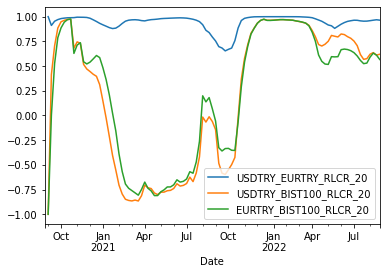

In [42]:
# plotting can be a good way in order to do a pre-examination since a comprehensive analysis is not
# the subject here
# Notice this needs 'matplotlib' package to run.
roll_corrs.plot();

Here you can see; there isn't any stable relitionship between (USDTRY, BIST100) and (EURTRY, BIST100)
since the relitionship swings severly in time affecting even the direction of the relitionship. However,
(USDTRY, EURTRY) is in a long-term stable relitionship with each other

#### 4.12. [__Z-Score: Z<sub>t</sub> = (y<sub>t</sub> - ȳ) / σ<sub>y</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-z-score)

The _Z-Score_ describes the position of a raw score in terms of its distance from the mean, when measured
in standard deviation units. Z-Score is a good measure for spotting deviations from the expected values
for a series which is normally distributed y:~N(μ, σ). Observing z-scores bigger than `+3` or smaller
than `-3` can be a good indication that the subject value is a suspected outlier even if the series are
not normally distributed under the assumptions of big sample size. You can get z-scores for provided
series using `z_score()` method.

In [48]:
usdtry = connector.get_series("usdtry", period="3m", frequency='B')

# this gives you all z-scores for all observations in all series provided.
usdtry_z = transformator.z_score(usdtry, precision=2)

In [49]:
usdtry_z.head()

,USDTRY,USDTRY_Z
Date,,
2022-05-26,16.267000,-1.91
2022-05-27,16.368000,-1.73
2022-05-30,16.348000,-1.77
2022-05-31,16.356001,-1.75
2022-06-01,16.388000,-1.70


`z-score()`, can be used for multi-dimentional series as well.

In [51]:
rates = connector.get_series("usdtry, eurtry", period="3m", frequency="B")

# This gives z-scores of USDTRY and EURTRY.
rates_z = transformator.z_score(rates, precision=2)

In [52]:
rates_z.head()

,USDTRY,EURTRY,USDTRY_Z,EURTRY_Z
Date,,,,
2022-05-26,16.267000,17.365999,-1.91,-1.84
2022-05-27,16.368000,17.510000,-1.73,-1.40
2022-05-30,16.348000,17.527000,-1.77,-1.35
2022-05-31,16.356001,17.601999,-1.75,-1.12
2022-06-01,16.388000,17.570000,-1.70,-1.22


#### 4.13. [__Median Absolute Deviation: median(|y<sub>t</sub> - median(y<sub>t</sub>)|)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-mad)

The _Median Absolute Deviation_ (__MAD__) describes the position of a median score in terms of its
distance from the median, when measured in absolute terms. It is very useful for describing the
variability of series with outliers. The median absolute deviation is a robust statistic, even for data
drawn from non-normal populations and could be used instead of z-score for measuring deviations from
the expectations as a substitute. Observing MADs bigger than `+3` or smaller than `-3` can be a good
indication that the subject value is a suspected outlier even if the series are not normally
distributed under the assumptions of big sample size. You can get MADs for provided series using
`mad()` method.

In [79]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [80]:
# this gives you all median absoulte deviations for all observations in all series provided.
usdtry_mad = transformator.mad(usdtry, precision=2)

In [81]:
usdtry_mad.head()

,USDTRY,USDTRY_MAD
Date,,
2022-06-01,16.387600,-2.65
2022-06-02,16.412701,-2.56
2022-06-03,16.438999,-2.47
2022-06-06,16.476500,-2.34
2022-06-07,16.558800,-2.05


`mad()`, can be used for multi-dimentional series as well.

In [88]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [89]:
# this gives you median absolute deviations of USDTRY and EURTRY series
rates_mad = transformator.mad(rates, precision=2)

In [90]:
rates_mad.head()

,USDTRY,EURTRY,USDTRY_MAD,EURTRY_MAD
Date,,,,
2022-06-01,16.387600,17.5702,-2.65,-1.22
2022-06-02,16.412701,17.5916,-2.56,-1.16
2022-06-03,16.438999,17.5700,-2.47,-1.22
2022-06-06,16.476500,17.7066,-2.34,-0.85
2022-06-07,16.558800,17.7785,-2.05,-0.66


#### 4.14. [__Normalized Series: y<sub>t, normal</sub> = F(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-normalized)

You can get nomralized series for given series to use them as inputs for other processes such as
machine learning algorithms. You can use `normalize()` method to get normalized series.

There are `6` normalization methods are defined in order to be used in normalization process, and
these are:

|Method        | Definition                                              | Range         |
|:-------------|:------------------------------------------------------- |:--------------|
|`simple`      |  x / (max(x) + 1)                                       | [0, +1)       |
| `min - max`  | (x - min(x)) / (max(x) - min(x))                        | (0, 1]        |
| `mean`       | (x - x̄) / (max(x) + 1)                                  | [-1, +1)      |
| `median`     | (x - median(x)) / (max(x) + 1)                          | [-1, +1)      |
| `mad`        | (x - median(x)) / (median(\|(x - median(x)\|)) * 1.4826 | (-inf, +inf)  |
| `z`          | (x- x̄) / σ<sub>x</sub>                                  | (-inf, +inf)  |

> 1.4826 is the scale factor and is equal to `1 / QNormal(%75)`

In [82]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [83]:
# this gives you normalized values (z-scores in this example) by given normalize method.
usdtry_normalized = transformator.normalize(usdtry, method="z")

In [84]:
usdtry_normalized.head(3)

,USDTRY,USDTRY_NORM
Date,,
2022-06-01,16.387600,-1.594162
2022-06-02,16.412701,-1.524827
2022-06-03,16.438999,-1.452183


In [62]:
# this gives you normalized values (simple method in this example) by given normalize method.
usdtry_normalized = transformator.normalize(usdtry, method="simple")

In [63]:
usdtry_normalized.head(3)

,USDTRY,USDTRY_NORM
Date,,
2022-05-26,16.267,0.849585
2022-05-27,16.368,0.854860
2022-05-30,16.348,0.853815


`normalize()`, can be used for multi-dimentional series as well.

In [91]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [92]:
# this gives the normalized values of both USDTRY and EURTRY
rates_normalized = transformator.normalize(rates, method='mad', keep_originals=False)

In [93]:
rates_normalized.head()

,USDTRY_NORM,EURTRY_NORM
Date,,
2022-06-01,-2.648009,-1.222451
2022-06-02,-2.560311,-1.164341
2022-06-03,-2.468427,-1.222994
2022-06-06,-2.337405,-0.852077
2022-06-07,-2.049859,-0.656846


#### 4.15. [__Dummy Series: D<sub>n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-dummies)

You can use `dummy()` method to create dummy series in line with given conditions. Dummy series are
very useful for modelling a structural/regime change or brake, and outliers in some applications.

Conditions to be used;

| condition | explanation
|:---------:|-----------------------------------------------------------------------------------------------|
| `>`       | greater than threshold                                                                        |
| `>=`      | greater than or equals to threshold                                                           |
| `<`       | smaller than threshold                                                                        |
| `<=`      | smaller than or equals to threshold                                                           |
| `()`      | greater than lower bound and smaller than upper bound (closed bounds)                         |
| `[]`      | greater than or equal to lower bound and smaller than or equal to upper bound (open bounds)   |

In [100]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [117]:
# this gives you a dummy series that its values are equal to 1 if a value in usdtry is greater than 8 and 0 otherwise.
usdtry_gt8 = transformator.dummy(usdtry, ">", 8)

In [118]:
usdtry_gt8

,USDTRY,USDTRY_GTT_8
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,0.0
2021-03-31,7.377,0.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [119]:
# this gives you a dummy series that its values are equal to 1 if a value in usdtry is greater than 8 and -1 otherwise.
usdtry_gt8 = transformator.dummy(usdtry, ">", 8, fill_true=1, fill_false=-1)

In [120]:
usdtry_gt8

,USDTRY,USDTRY_GTT_8
Date,,
2020-03-31,6.094,-1.0
2020-06-30,6.853,-1.0
2020-09-30,7.208,-1.0
2020-12-31,7.862,-1.0
2021-03-31,7.377,-1.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [121]:
# this gives you a dummy series that its values are equal to 2 if a value in usdtry is smaller or
# equal than 8 and 1 otherwise.
usdtry_st8 = transformator.dummy(usdtry, "<=", 8, fill_true=2, fill_false=1)

In [122]:
usdtry_st8

,USDTRY,USDTRY_SOET_8
Date,,
2020-03-31,6.094,2.0
2020-06-30,6.853,2.0
2020-09-30,7.208,2.0
2020-12-31,7.862,2.0
2021-03-31,7.377,2.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [123]:
# this gives you a dummy series that its values are equal to 1 if a value in usdtry is greater than 7.21
# or smaller than 8.37 (closed bounds).
usdtry_d1 = transformator.dummy(usdtry, "()", "7.21, 8.37")

In [124]:
usdtry_d1

,USDTRY,USDTRY_CBOUND
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,1.0
2021-03-31,7.377,1.0
2021-06-30,8.370,0.0
2021-09-30,8.528,0.0
2021-12-31,11.161,0.0


In [96]:
# this gives you a dummy series that its values are equal to 1 if a value in usdtry is equal or greater than 7.21
# or equal or smaller than 8.37 (open bounds).
usdtry_d1 = transformator.dummy(usdtry, "[]", "7.21, 8.37", keep_originals=False)

In [109]:
# bounds can be given as lists or tuples as well
open_bounds = [7.21, 8.37]
usdtry_d1 = transformator.dummy(usdtry, "[]", open_bounds)

In [110]:
usdtry_d1

,USDTRY,USDTRY_OBOUND
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,1.0
2021-03-31,7.377,1.0
2021-06-30,8.370,1.0
2021-09-30,8.528,0.0
2021-12-31,11.161,0.0


`dummy()`, can be used for multi-dimentional series as well.

In [125]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [128]:
# this gives you a dummy series that its values are equal to 1 if a value in usdtry is equal or greater than 7.21
# or equal or smaller than 8.37 (open bounds).
rates_d1 = transformator.dummy(rates, "[]", "7.21, 8.37", keep_originals=False)

In [129]:
rates_d1

,USDTRY_OBOUND,EURTRY_OBOUND
Date,,
2020-03-31,0.0,0.0
2020-06-30,0.0,1.0
2020-09-30,0.0,0.0
2020-12-31,1.0,0.0
2021-03-31,1.0,0.0
2021-06-30,1.0,0.0
2021-09-30,0.0,0.0
2021-12-31,0.0,0.0


#### 4.16. [__Lagged Series: y<sub>t-1</sub>, y<sub>t-2</sub> ... y<sub>t-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-laggeds)

You can use `laggeds()` method to get lagged series of given series. This series can be useful for
some specific modelling and, correcting the serial correlation problem in general.

In [3]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [4]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [7]:
# this gives you only usdtry(t-2)
usdtry_l2 = transformator.laggeds(usdtry, lags=2)

In [8]:
usdtry_l2

,USDTRY,USDTRY_LAG_2
Date,,
2020-03-31,6.093850,NaN
2020-06-30,6.852923,NaN
2020-09-30,7.207746,6.093850
2020-12-31,7.861628,6.852923
2021-03-31,7.377400,7.207746
2021-06-30,8.369557,7.861628
2021-09-30,8.527857,7.377400
2021-12-31,11.161016,8.369557


In [10]:
# this gives you usdtry(t-1), usdtry(t-3) and usdtry(t-5)
usdtry_135 = transformator.laggeds(usdtry, lags="1, 3, 5")

In [11]:
usdtry_135

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,NaN,NaN
2020-12-31,7.861628,7.207746,6.093850,NaN
2021-03-31,7.377400,7.861628,6.852923,NaN
2021-06-30,8.369557,7.377400,7.207746,6.093850
2021-09-30,8.527857,8.369557,7.861628,6.852923
2021-12-31,11.161016,8.527857,7.377400,7.207746


In [12]:
lags = [1, 3, 5]

# this also gives you usdtry(t-1), usdtry(t-3) and usdtry(t-5)
usdtry_135 = transformator.laggeds(usdtry, lags=lags)

In [13]:
usdtry_135

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,NaN,NaN
2020-12-31,7.861628,7.207746,6.093850,NaN
2021-03-31,7.377400,7.861628,6.852923,NaN
2021-06-30,8.369557,7.377400,7.207746,6.093850
2021-09-30,8.527857,8.369557,7.861628,6.852923
2021-12-31,11.161016,8.527857,7.377400,7.207746


In [14]:
# this gives you usdtry(t-1), usdtry(t-2), usdtry(t-3)
usdtry_3 = transformator.laggeds(usdtry, range_lags=3)

In [15]:
usdtry_3

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,6.093850,NaN
2020-12-31,7.861628,7.207746,6.852923,6.093850
2021-03-31,7.377400,7.861628,7.207746,6.852923
2021-06-30,8.369557,7.377400,7.861628,7.207746
2021-09-30,8.527857,8.369557,7.377400,7.861628
2021-12-31,11.161016,8.527857,8.369557,7.377400


In [18]:
# this gives you usdtry(t-1), usdtry(t-2), usdtry(t-4), usdtry(t-6)
usdtry_12612 = transformator.laggeds(usdtry, range_lags=2, lags="4, 6")

In [19]:
usdtry_12612

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_4,USDTRY_LAG_6
Date,,,,,
2020-03-31,6.093850,NaN,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN,NaN
2020-09-30,7.207746,6.852923,6.093850,NaN,NaN
2020-12-31,7.861628,7.207746,6.852923,NaN,NaN
2021-03-31,7.377400,7.861628,7.207746,6.093850,NaN
2021-06-30,8.369557,7.377400,7.861628,6.852923,NaN
2021-09-30,8.527857,8.369557,7.377400,7.207746,6.093850
2021-12-31,11.161016,8.527857,8.369557,7.861628,6.852923


`laggeds()`, can be used for multi-dimentional series as well.

In [22]:
# this gives you usdtry(t-1), eurtry(t-1), usdtry(t-2), eurtry(t-2),
# usdtry(t-4), eurtry(t-4), usdtry(t-6), eurtry(t-6)
rates_lag = transformator.laggeds(rates, range_lags=2, lags="4, 6", precision=2, keep_originals=False)

In [23]:
rates_lag

,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2,USDTRY_LAG_4,EURTRY_LAG_4,USDTRY_LAG_6,EURTRY_LAG_6
Date,,,,,,,,
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,6.09,6.72,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,6.85,7.55,6.09,6.72,NaN,NaN,NaN,NaN
2020-12-31,7.21,8.42,6.85,7.55,NaN,NaN,NaN,NaN
2021-03-31,7.86,9.37,7.21,8.42,6.09,6.72,NaN,NaN
2021-06-30,7.38,8.90,7.86,9.37,6.85,7.55,NaN,NaN
2021-09-30,8.37,10.08,7.38,8.90,7.21,8.42,6.09,6.72
2021-12-31,8.53,10.06,8.37,10.08,7.86,9.37,6.85,7.55


#### 4.17. [__Correlation Coefficients: ρ(y<sub>t</sub>, x<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-corr)

You can use `corr()` method to get correlation coefficients between given series. This is especially
important for easily detecting possible multi co-linearity problem in considering model.
Significant correlations (`ρ > 0.6` or `ρ < -0.6` in general) between considering independent
variables for a model indicate that the considering model will probably suffer from multi co-linearity
problem. You can get `Pearson Linear`, `Kendall Tau`, and `Spearman Rank` correlation coefficients using
`corr()` method.

> Notice that computing the Kendall Tau correlation coefficients requires the `scipy` package.

In [29]:
# get series using reference names
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="M")

In [30]:
# this gives you the Pearson's linear correlation coeeficient between usdtry, eurtry and bist100 series
corrs = transformator.corr(series, precision=4)

In [31]:
corrs

,USDTRY,EURTRY,BIST100
USDTRY,1.0000,0.9978,0.8475
EURTRY,0.9978,1.0000,0.8287
BIST100,0.8475,0.8287,1.0000


In [32]:
# This gives you the Spearman rank correlation coefficients between usdtry, eurtry and bist100 series
corrs_sp = transformator.corr(series, method='spearman')

In [33]:
corrs_sp

,USDTRY,EURTRY,BIST100
USDTRY,1.000000,0.972028,0.370629
EURTRY,0.972028,1.000000,0.349650
BIST100,0.370629,0.349650,1.000000


#### 4.18. [__Autocorrelation Coefficients: AUTOCORR<sub>t</sub> = ρ<sub>t, t-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-auto-corr)

You can use `autocorr()` method to get autocorrelations between the original series and given lags of
them. The autocorrelations could provide you a very quick insight about the stationary state of the
series provided. Significant correlations (`ρ > 0.6` or `ρ < -0.6` in general) between the series
and its laggeds indicates that the observations are highly dependent on their prior values in time,
and therefore, that would indicate that the mean of the series depends on and changes through time
(a possible stochastic trend flag).

In [10]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [13]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [11]:
usdtry.head(3)

,USDTRY
Date,
2020-01-03,5.94125
2020-01-10,5.94520
2020-01-17,5.87128


In [14]:
rates.head(3)

,USDTRY,EURTRY
Date,,
2020-03-31,6.093850,6.723150
2020-06-30,6.852923,7.547287
2020-09-30,7.207746,8.423696


In [40]:
# this gives you the aoutocorrelations between usdtry and usdtry(t-1), usdtry(t-2), usdtry(t-3)
autocorrs = transformator.autocorr(usdtry, range_lags=3)

In [41]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3
USDTRY,1.000000,0.978949,0.949550,0.923296
USDTRY_LAG_1,0.978949,1.000000,0.989265,0.968197
USDTRY_LAG_2,0.949550,0.989265,1.000000,0.989223
USDTRY_LAG_3,0.923296,0.968197,0.989223,1.000000


In [42]:
# this gives you the aoutocorrelations between usdtry and usdtry(t-1), usdtry(t-3), usdtry(t-5)
autocorrs = transformator.autocorr(usdtry, lags="1, 3, 5")

In [43]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
USDTRY,1.000000,0.978949,0.923296,0.863355
USDTRY_LAG_1,0.978949,1.000000,0.968197,0.901092
USDTRY_LAG_3,0.923296,0.968197,1.000000,0.954251
USDTRY_LAG_5,0.863355,0.901092,0.954251,1.000000


In [38]:
# this gives you the aoutocorrelations between;
# usdtry and usdtry(t-1), usdtry(t-2), usdtry(t-3), usdtry(t-4) and usdtry(t-12)
autocorrs = transformator.autocorr(usdtry, range_lags=4, lags=12)

In [39]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3,USDTRY_LAG_4,USDTRY_LAG_12
USDTRY,1.000000,0.978949,0.949550,0.923296,0.892856,0.644941
USDTRY_LAG_1,0.978949,1.000000,0.989265,0.968197,0.938588,0.657745
USDTRY_LAG_2,0.949550,0.989265,1.000000,0.989223,0.963580,0.683205
USDTRY_LAG_3,0.923296,0.968197,0.989223,1.000000,0.986399,0.724432
USDTRY_LAG_4,0.892856,0.938588,0.963580,0.986399,1.000000,0.774338
USDTRY_LAG_12,0.644941,0.657745,0.683205,0.724432,0.774338,1.000000


`autocorr()`, can be used for multi-dimentional series as well.

In [15]:
# you can use 'column' parameter to get autocorrelations for any series in given dataframe
# column can be given as column name or column index (starting from 0)

# this picks eurtry and gives autocorrelations
eurtry_autocorr = transformator.autocorr(rates, column='eurtry', range_lags=4, precision=4)

In [16]:
eurtry_autocorr

,EURTRY,EURTRY_LAG_1,EURTRY_LAG_2,EURTRY_LAG_3,EURTRY_LAG_4
EURTRY,1.0000,0.7977,0.8495,0.5765,0.9214
EURTRY_LAG_1,0.7977,1.0000,0.8470,0.8450,0.7341
EURTRY_LAG_2,0.8495,0.8470,1.0000,0.7933,0.8242
EURTRY_LAG_3,0.5765,0.8450,0.7933,1.0000,0.8115
EURTRY_LAG_4,0.9214,0.7341,0.8242,0.8115,1.0000


In [51]:
# this also picks picks eurtry and gives autocorrelations since the column index of eurtry is 1
eurtry_autocorr = transformator.autocorr(rates, column=1, range_lags=4, precision=4)

In [52]:
eurtry_autocorr

,EURTRY,EURTRY_LAG_1,EURTRY_LAG_2,EURTRY_LAG_3,EURTRY_LAG_4
EURTRY,1.0000,0.7977,0.8495,0.5765,0.9214
EURTRY_LAG_1,0.7977,1.0000,0.8470,0.8450,0.7341
EURTRY_LAG_2,0.8495,0.8470,1.0000,0.7933,0.8242
EURTRY_LAG_3,0.5765,0.8450,0.7933,1.0000,0.8115
EURTRY_LAG_4,0.9214,0.7341,0.8242,0.8115,1.0000


#### 4.19. [__Serial Correlation Coefficients: SERIALCORR<sub>t</sub> = ρ<sub>t, x-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-serial-corr)

You can use `serial_corr()` method to get a correlation vector between the constant and the others.
The vector could provide you a very quick insight about linear relitionships between a constant series
and the others including their lags.

In [5]:
# get series using reference names
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="B")

In [8]:
series.head(3)

,USDTRY,EURTRY,BIST100
Date,,,
2021-01-01,NaN,NaN,NaN
2021-01-04,7.4194,9.1164,1495.430054
2021-01-05,7.3602,9.0382,1489.560059


In [6]:
# this holds bist100 as the constant, and gives the correlations with orher series including
# given lags.
sc_vector = transformator.serial_corr(series, hold="bist100", range_lags=4, lags=12)

In [7]:
sc_vector

,BIST100
BIST100,1.000000
USDTRY,0.802526
EURTRY,0.795602
USDTRY_LAG_1,0.790575
EURTRY_LAG_1,0.781897
USDTRY_LAG_2,0.783268
EURTRY_LAG_2,0.773447
USDTRY_LAG_3,0.781320
EURTRY_LAG_3,0.770897
USDTRY_LAG_4,0.781647


In [21]:
# this holds usddtry as the constant since the column index of usdtry=0 and gives the correlations
# with orher series including given lags.
sc_vector = transformator.serial_corr(series, hold=0, range_lags=4, lags=12, precision=4)

In [22]:
sc_vector

,USDTRY
USDTRY,1.0000
EURTRY,0.9975
BIST100,0.8025
EURTRY_LAG_1,0.9772
BIST100_LAG_1,0.8121
EURTRY_LAG_2,0.9550
BIST100_LAG_2,0.8133
EURTRY_LAG_3,0.9325
BIST100_LAG_3,0.8096
EURTRY_LAG_4,0.9172


#### 4.20. [__Outliers__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-outliers)

You can use `outliers()` method to create dummy series for detected outliers in given series.

Returned dummy series consist of `0`s and `1`s indicating:
- `1`: an outlier values is detected in corresponding date.
- `0`: the value is in the bound of expectations.

In [23]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [40]:
# get series using reference names
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [25]:
# this gives you detected outliers in line with mad and -3, +3 critical values bounds.
usdtry_outliers_d = transformator.outliers(usdtry)

In [26]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,1.0
2021-12-10,13.69762,1.0
2021-12-17,14.42048,1.0


In [32]:
# this gives you detected outliers in line with mad and -5, +5 critical values bounds.
usdtry_outliers_d = transformator.outliers(usdtry, critical_upper=5, critical_lower=-5)

In [33]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,0.0
2021-12-10,13.69762,1.0
2021-12-17,14.42048,1.0


In [36]:
# this gives you detected outliers in line with z-score and -3, +3 critical values bounds.
usdtry_outliers_d = transformator.outliers(usdtry, method="z", critical_lower=-4, critical_upper=4)

In [37]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,0.0
2021-12-10,13.69762,0.0
2021-12-17,14.42048,1.0


`outliers()`, can be used for multi-dimentional series as well.

In [45]:
# this gives you detected outliers for all series in frame  in line with z-score and
# -2.56, +2.56 critical values bounds.
all_outliers = transformator.outliers(
    series, method="z", critical_lower=-2.56, critical_upper=2.56, keep_originals=False
)

In [46]:
all_outliers

,USDTRY_OUT,EURTRY_OUT,BIST100_OUT
Date,,,
2020-01-03,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0
2020-01-17,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
...,...,...,...
2021-12-03,1.0,1.0,0.0
2021-12-10,1.0,1.0,1.0
2021-12-17,1.0,1.0,1.0


#### 4.21. [__Smoothed Series__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-smoothed)

You can use `smooth()` method to get smoothed out series against outlier values in line with given
outliers detection criteria. Removing outliers through smoothing and using smoothed series as a substitute of originals
is a good way for modelling the general behaviors between variables instead of modelling for precise forecasting.

Returned series from `smooth()` method consist of:
- Smoothed Values: For detected outliers.
- Original Observations: For inbound values.
- Smoothing is done using given smooth method (ema or sma) and its window

In [6]:
# get series using reference names
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2014",
                              end_date="31.12.2021",
                              frequency="M")

In [7]:
# get series using reference names
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2014",
                              end_date="31.12.2021",
                              frequency="M")

In [20]:
# this gives you smoothed usdtry in which outliers detected in line with mad bounds (-3.0, +3.0)
# and out of bound values (if detected) are smoothed with sma(series, 3) values, whereas, in bound
# values are not touched.
smoothed_mad = transformator.smooth(usdtry, smooth_method='sma', smooth_window=3)

In [21]:
smoothed_mad.tail(10)

,USDTRY,USDTRY_SMOOTH
Date,,
2021-03-31,7.628235,7.628235
2021-04-30,8.155024,8.155024
2021-05-31,8.342250,8.342250
2021-06-30,8.596682,8.596682
2021-07-31,8.612941,8.612941
2021-08-31,8.475715,8.475715
2021-09-30,8.511882,8.511882
2021-10-31,9.139945,9.139945
2021-11-30,10.523264,10.523264


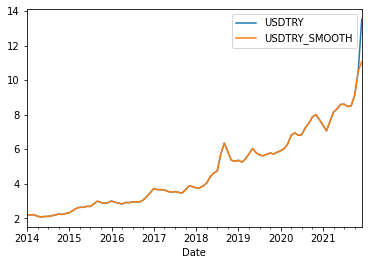

In [22]:
# notice you need to 'matplotlib' package to see below graph
smoothed_mad.plot();

In [23]:
# this gives you smoothed usdtry in which outliers detected in line with mad bounds (-3.0, +3.0)
# and out of bound values (if detected) are smoothed with sma(series, 3) values, whereas, in bound
# values are not touched.
smoothed_mad = transformator.smooth(usdtry, smooth_method='ema', smooth_window=2)

In [24]:
smoothed_mad.tail(10)

,USDTRY,USDTRY_SMOOTH
Date,,
2021-03-31,7.628235,7.628235
2021-04-30,8.155024,8.155024
2021-05-31,8.342250,8.342250
2021-06-30,8.596682,8.596682
2021-07-31,8.612941,8.612941
2021-08-31,8.475715,8.475715
2021-09-30,8.511882,8.511882
2021-10-31,9.139945,9.139945
2021-11-30,10.523264,10.523264


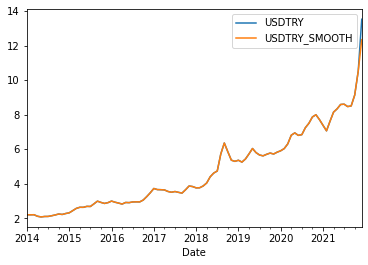

In [15]:
# notice you need to 'matplotlib' package to see below graph
smoothed_mad.plot();

`smooth()`, can be used for multi-dimentional series as well.

In [28]:
# this gives you smoothed rates in which outliers detected in line with z-score bounds (-2.56, +2.56)
# and out of bound values (if detected) are smoothed with ema(series, 3) values, whereas, in bound
# values are not touched.
smoothed_rates = transformator.smooth(
    series=rates,
    method='z',
    critical_lower=-2.56,
    critical_upper=2.56,
    smooth_method='ema',
    smooth_window=3,
    keep_originals=False,
    precision=2
)

In [29]:
smoothed_rates.tail(10)

,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,
2021-03-31,7.63,9.09
2021-04-30,8.16,9.73
2021-05-31,8.34,10.13
2021-06-30,8.60,10.37
2021-07-31,8.61,10.19
2021-08-31,8.48,9.98
2021-09-30,8.51,10.03
2021-10-31,9.14,10.60
2021-11-30,10.52,12.01


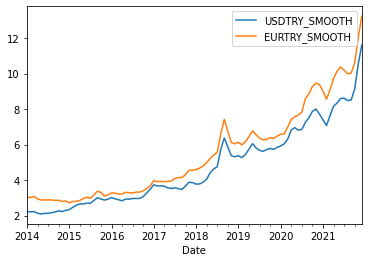

In [27]:
# notice you need to 'matplotlib' package to see below graph
smoothed_rates.plot();

### 5. [__Joining The Connector and Transformator Methods__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#joining-methods)

You can chain both `Connector` and `Transformator` class methods if you would like to do so.

In [52]:
connector = Connector()          # assuming you have already saved your API Key on disk.
transformator = Transformator()

Below cases assumes you have already saved reference names like below:
- usdtry -> 'TP.DK.USD.A.YTL'
- eurtry -> 'TP.DK.EUR.A.YTL'

In [53]:
# this gives you smoothed usdtry and eurtry
smoothed_rates = (
    transformator
    .smooth(
            connector
            .get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
    )
)

In [54]:
smoothed_rates.tail(10)

,USDTRY,EURTRY,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,,,
2021-03-31,7.628235,9.091334,7.628235,9.091334
2021-04-30,8.155024,9.733895,8.155024,9.733895
2021-05-31,8.342250,10.130661,8.342250,10.130661
2021-06-30,8.596682,10.371214,8.596682,10.371214
2021-07-31,8.612941,10.192188,8.612941,10.192188
2021-08-31,8.475715,9.978305,8.475715,9.978305
2021-09-30,8.511882,10.028577,8.511882,10.028577
2021-10-31,9.139945,10.601325,9.139945,10.601325
2021-11-30,10.523264,12.011395,10.523264,11.478622


In [55]:
# This also gives you smoothed usdtry and eurtry
smoothed_rates = transformator.smooth(
    connector.get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
)

In [56]:
smoothed_rates.tail(10)

,USDTRY,EURTRY,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,,,
2021-03-31,7.628235,9.091334,7.628235,9.091334
2021-04-30,8.155024,9.733895,8.155024,9.733895
2021-05-31,8.342250,10.130661,8.342250,10.130661
2021-06-30,8.596682,10.371214,8.596682,10.371214
2021-07-31,8.612941,10.192188,8.612941,10.192188
2021-08-31,8.475715,9.978305,8.475715,9.978305
2021-09-30,8.511882,10.028577,8.511882,10.028577
2021-10-31,9.139945,10.601325,9.139945,10.601325
2021-11-30,10.523264,12.011395,10.523264,11.478622


In [61]:
# This gives you smoothed usdtry and eurtry evaluating with z_score bounds (-1.96, +1.96), but,
# notice the original usdtry and eurtry series is not included in returned smoothed data here
# since the 'keep_originals' flag is set to `False`
smoothed_rates = (
    transformator
    .smooth(
        series=connector.get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M"),
        method="z", critical_lower=-1.96, critical_upper=1.96, keep_originals=False
    )
)

In [62]:
smoothed_rates.tail(10)

,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,
2021-03-31,7.628235,9.091334
2021-04-30,8.155024,9.733895
2021-05-31,8.342250,10.130661
2021-06-30,8.596682,10.371214
2021-07-31,8.612941,10.192188
2021-08-31,8.475715,9.978305
2021-09-30,8.511882,10.028577
2021-10-31,9.139945,10.601325
2021-11-30,9.992125,11.478622


In [66]:
# this gives you sma(usdtry, 3), sma(eurtry, 3) and 2 dummy series which are:

# USDTRY_SMA_3_GTT_9:
# 1, if 12 < sma(usdtry, 3) < 10
# 0, otherwise

# EURTRY_SMA_3_GTT_9:
# 1, if 12 < sma(eurtry, 3) < 10
# 0, otherwise

rates_sma_3_dummy = (
    transformator
     .dummy(
        transformator
         .sma(
            connector
                .get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
         , window=3, keep_originals=False)
     , condition="()", threshold=(10, 12)
     )
)

In [67]:
rates_sma_3_dummy.tail(10)

,USDTRY_SMA_3,EURTRY_SMA_3,USDTRY_SMA_3_CBOUND,EURTRY_SMA_3_CBOUND
Date,,,,
2021-03-31,7.364858,8.885203,0.0,0.0
2021-04-30,7.618541,9.127138,0.0,0.0
2021-05-31,8.041836,9.651964,0.0,0.0
2021-06-30,8.364652,10.078590,0.0,1.0
2021-07-31,8.517291,10.231354,0.0,1.0
2021-08-31,8.561779,10.180569,0.0,1.0
2021-09-30,8.533512,10.066357,0.0,1.0
2021-10-31,8.709181,10.202736,0.0,1.0
2021-11-30,9.391697,10.880432,0.0,1.0
